# Predicting Breast Cancer: A Step-by-Step Guide

Within this notebook, I aim to provide an in-depth walkthrough of my analytical approach and strategic thinking during the development of a machine learning solution designed to discern and categorize diagnoses as either malignant or benign. This endeavor isn't just an exercise; rather, it mirrors a genuine real-world case scenario. My objective here is to establish a solution that not only functions effectively but also demonstrates sustainability.

Given the health-related nature of the dataset at hand, I am acutely attuned to the significance of fine-tuning every parameter to achieve optimal performance and ensure the reproducibility of the project's outcomes. Recognizing the criticality of accuracy and reliability, I am committed to refining each aspect of the solution meticulously.

To achieve this, I plan to follow a systematic and structured approach. Starting from exploratory data analysis, I will delve into understanding the dataset's characteristics, distributions, and potential challenges. This preliminary step is essential to grasp the nuances of the data and make informed decisions throughout the project.

Subsequently, feature selection and engineering will play a pivotal role. Identifying the most relevant attributes and potentially creating new features can significantly enhance the model's ability to capture underlying patterns. I will prioritize interpretability without compromising predictive power, as a transparent model is crucial in medical contexts.

Model selection will be conducted with a comprehensive evaluation of various algorithms. My intention is to experiment with different machine learning techniques, ranging from traditional models to more advanced ones, such as ensemble methods and neural networks. This diversity in experimentation allows for a thorough understanding of the dataset's compatibility with different algorithms.

Once a model is selected, hyperparameter tuning will be conducted meticulously. The parameters' values will be adjusted to ensure optimal performance while avoiding overfitting. Rigorous cross-validation will be employed to validate the model's generalization capability, assuring its reliability on unseen data.

Lastly, I will pay special attention to the interpretability of the final model's decisions. Transparent models not only provide insights into the classification process but also instill confidence in medical practitioners and stakeholders.

This notebook embarks on a journey that mimics real-world challenges in healthcare diagnostics. My dedication lies in creating a robust and sustainable solution that not only achieves accuracy but also embodies transparency and reproducibility. This is more than just a technical exercise; it's a demonstration of responsible and thoughtful data science applied to a critical domain.

## Personal Challenge

As someone without a background in medical sciences, I place a particular emphasis on comprehending every single facet of this dataset. It is paramount for me to delve deeply into understanding the data's origin, the methodologies employed in its collection, and the context of its dictionary.

## The data

The Breast Cancer Wisconsin (Diagnostic) dataset, commonly referred to as the "WDBC dataset," is a well-known and widely used dataset in the field of machine learning and data analysis. It was originally collected and compiled by Dr. William H. Wolberg at the University of Wisconsin Hospitals in Madison, USA. The dataset is available through the UCI Machine Learning Repository.

The primary objective of the WDBC dataset is to aid in the classification of breast cancer tumors into two categories: malignant (cancerous) and benign (non-cancerous). This classification is based on various features extracted from digitized images of fine needle aspirates (FNA) of breast mass lesions. These features are computed from the cell nuclei present in the images and are designed to capture different aspects of the cells' characteristics.

The dataset consists of 30 features computed from each cell nucleus, including properties such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension. For each feature, the dataset provides three values: the mean, standard error, and worst (largest) value. This results in a total of 10 features measured in triplicate, yielding a total of 30 features.

In terms of the dataset's structure, it contains a total of 569 instances, each corresponding to a breast mass lesion. Out of these instances:

- 212 are labeled as malignant (1), indicating cancerous tumors.
- 357 are labeled as benign (0), indicating non-cancerous tumors.

The WDBC dataset is commonly used for tasks such as binary classification, where machine learning algorithms are trained to differentiate between malignant and benign tumors based on the provided features. Researchers and data scientists often use this dataset to experiment with various classification algorithms, evaluate their performance, and explore feature selection and engineering techniques.

It's important to note that while the dataset provides a valuable resource for developing and testing machine learning models, its applicability in real-world medical diagnosis might be limited by factors such as its specific origin (collected from a single institution) and potential differences across different populations. Therefore, caution should be exercised when applying models trained on this dataset to real clinical settings.

## Breast Cancer

Breast cancer is a type of cancer that originates in the cells of the breast. It occurs when the normal cells in the breast tissue undergo genetic mutations that cause them to grow and divide uncontrollably, eventually forming a mass or tumor. These tumors can be classified as either malignant (cancerous) or benign (non-cancerous).

Malignant tumors are cancerous and have the potential to invade nearby tissues and spread to other parts of the body through the bloodstream or lymphatic system. This process is called metastasis, and it can make the cancer more difficult to treat.

Benign tumors, on the other hand, do not invade nearby tissues or spread to other parts of the body. They may still require medical attention or treatment, especially if they cause discomfort, but they are generally not life-threatening.

Breast cancer can affect both men and women, but it is much more common in women. It is the most common cancer among women worldwide. Risk factors for developing breast cancer include age, family history of breast cancer, certain gene mutations (such as BRCA1 and BRCA2), hormone replacement therapy, exposure to ionizing radiation, and certain lifestyle factors like obesity and alcohol consumption.

Early detection is crucial for successful treatment and improved outcomes. Regular breast self-exams, clinical breast exams by healthcare professionals, and mammograms (X-ray images of the breast) are common methods for detecting breast cancer. Treatment options for breast cancer depend on factors such as the stage of the cancer, the type of tumor, and the patient's overall health. Treatments may include surgery, chemotherapy, radiation therapy, hormone therapy, targeted therapy, and immunotherapy.

Breast cancer awareness campaigns, research efforts, and advancements in medical technology have led to better understanding, earlier detection, and improved treatment options for this disease. It's important for individuals to be aware of their risk factors and engage in regular screenings as recommended by healthcare professionals.

## Kaggle files

In [244]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Dependencies

In [245]:
!pip install -q xgboost
!pip install -q feature_engine
!pip install -q lightgbm
!pip install -q catboost

## Libraries

In [246]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
PALETTE = "Blues"
RANDOM_STATE = 43154501 # Smashed the keyboard!
%matplotlib inline

## Data

In [247]:
data = pd.read_csv("data.csv")
data.drop(["id", "Unnamed: 32"], axis = 1, inplace = True)

### Characteristics

The features within the dataset are derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. This method involves collecting a sample of cells from a breast lesion using a fine needle and then analyzing these cells under a microscope. The dataset's features are a result of quantifying various characteristics of the cell nuclei present in these images.

Each feature encapsulates valuable information about the nuclei's properties, helping to distinguish between malignant and benign tumors. These characteristics include measures like radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. These features serve as quantifiable descriptors that reflect the morphology and structural attributes of the cell nuclei.

The dataset's structure inherently poses a challenge due to its high dimensionality. To address this, the dataset's features are projected into a 3-dimensional space, as described in the work by Bennett and Mangasarian. This technique allows for a simplified representation of the data that aids in discerning patterns and relationships between malignant and benign cases.

The utilization of digitized images, coupled with feature extraction, enables the conversion of complex cellular properties into numerical attributes. These attributes become the basis for statistical analysis and machine learning algorithms. By translating the inherent complexity of biological tissues into quantifiable parameters, the dataset empowers researchers and data scientists to apply computational techniques for diagnostic classification.

In essence, the features within the Breast Cancer Wisconsin dataset offer a multidimensional perspective on cellular nuclei characteristics. The process involves extracting essential attributes from digitized images, which are then structured in a way that facilitates analysis and classification. This approach bridges the gap between medical imaging and quantitative analysis, contributing to the advancement of breast cancer diagnosis and research.

- [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34](https://www.tandfonline.com/doi/abs/10.1080/10556789208805504).

### Dictionary

| Variable                    | Meaning                                          |
|----------------------------|--------------------------------------------------
| diagnosis                  | Diagnosis classification (M: Malignant, B: Benign)|
| radius_mean                | Mean of distances from center to points on the perimeter |
| texture_mean               | Standard deviation of gray-scale values           |
| perimeter_mean             | Perimeter of the tumor                            |
| area_mean                  | Area of the tumor                                 |
| smoothness_mean            | Local variation in radius lengths                |
| compactness_mean           | Perimeter^2 / area - 1.0                          |
| concavity_mean             | Severity of concave portions of the contour       |
| concave points_mean        | Number of concave portions of the contour         |
| symmetry_mean              | Symmetry of the tumor                             |
| fractal_dimension_mean     | "Coastline approximation" - 1                    |
| radius_se                  | Standard error of the mean of distances           |
| texture_se                 | Standard error of texture                         |
| perimeter_se               | Standard error of perimeter                      |
| area_se                    | Standard error of area                           |
| smoothness_se              | Standard error of smoothness                     |
| compactness_se             | Standard error of compactness                    |
| concavity_se               | Standard error of concavity                      |
| concave points_se          | Standard error of concave points                 |
| symmetry_se                | Standard error of symmetry                       |
| fractal_dimension_se       | Standard error of fractal dimension              |
| radius_worst               | Worst (largest) value of radius                   |
| texture_worst              | Worst (largest) value of texture                  |
| perimeter_worst            | Worst (largest) value of perimeter                |
| area_worst                 | Worst (largest) value of area                     |
| smoothness_worst           | Worst (largest) value of smoothness               |
| compactness_worst          | Worst (largest) value of compactness              |
| concavity_worst            | Worst (largest) value of concavity                |
| concave points_worst       | Worst (largest) value of concave points           |
| symmetry_worst             | Worst (largest) value of symmetry                 |
| fractal_dimension_worst    | Worst (largest) value of fractal dimension        |

# Process and cleanse the data.

The data cleaning phase in a data science project is a critical step to ensure the accuracy, reliability, and quality of the dataset. This phase involves identifying and rectifying various issues that can impact the integrity of the data and the outcomes of subsequent analysis and modeling.

One of the primary tasks in data cleaning is handling missing values. Missing data points can distort analysis, so techniques like imputation or removal are employed to address this issue. Additionally, outliers—data points that significantly deviate from the norm—are identified and managed to prevent their undue influence on results.

Inconsistencies, whether in naming conventions, data formats, or values, are rectified to ensure uniformity and reliability. Duplicate entries, which can arise from errors during data collection, are identified and eliminated. Data format issues, such as converting data types or standardizing units, are crucial for accurate analysis. Furthermore, the cleaning phase involves addressing spelling errors, special characters, and handling data entry errors that might affect the dataset's integrity.

Ultimately, the data cleaning phase serves to create a trustworthy foundation for analysis and modeling, enhancing the project's overall reliability and validity. It requires a blend of domain expertise, statistical techniques, and meticulous attention to detail to refine the raw data into a refined and coherent dataset ready for subsequent phases of the project.

## Data information

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

All the predictors are numeric data, when tackling a classification problem with solely numeric predictors, some challenges emerge. The dimensionality of the data can lead to computational complexities and overfitting risks. Selecting relevant predictors becomes critical to avoid noise from extraneous features.

The varying scales of numeric predictors demand careful scaling or normalization to ensure algorithm accuracy. However, complex models might compromise interpretability. Non-linear relationships between predictors and the target can necessitate non-linear algorithms and innovative feature engineering.

Overfitting is a concern due to the multitude of numeric predictors. Balancing model complexity and generalization requires regularization, cross-validation, and diligent evaluation. Addressing these challenges involves adept preprocessing, effective feature selection, and suitable algorithms for high-dimensional numeric data. Consistent validation and testing ensure the approach extends effectively to new data.

In [249]:
# Dimensionality

data.describe()[1:].T

,mean,std,min,25%,50%,75%,max
radius_mean,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [250]:
# Missing values

data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [251]:
# Duplicated observations

data.duplicated().sum()

0

Fortunately, the dataset exhibits a positive attribute: it is devoid of any missing values, duplicated entries, or data requiring cleaning or transformation. This initial state of cleanliness and completeness grants us a solid foundation to proceed with subsequent stages of analysis. As we progress, our focus will shift toward two significant areas: the creation of new features and the reduction of dimensionality.

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a foundational phase in data science projects that involves a holistic exploration of the dataset's intricacies. This process encompasses a range of tasks aimed at uncovering patterns, trends, and anomalies, which lay the groundwork for subsequent analysis and modeling.

Through summary statistics, EDA provides a snapshot of the data's central tendencies, dispersion, and distributions. Visualizations take center stage in understanding relationships among variables, revealing potential correlations and dependencies that guide further investigation. By delving into both numeric and categorical features, EDA unveils insights into their distributions and interactions, shedding light on the underlying structure of the data.

Crucially, EDA addresses data quality and integrity. Detecting outliers and assessing missing values helps decide whether data imputation or removal is necessary. Moreover, EDA scrutinizes the target variable in classification tasks, pinpointing class distributions and potential class imbalances.

As a result, EDA accomplishes more than data exploration—it sparks hypotheses and informs subsequent steps. It empowers data scientists to refine their approach, make informed decisions about data preprocessing, and select suitable modeling techniques. By distilling complex data into interpretable insights, EDA serves as the essential compass guiding the trajectory of the entire data science project.

## diagnosis (Target) 
Diagnosis classification (M: Malignant, B: Benign)

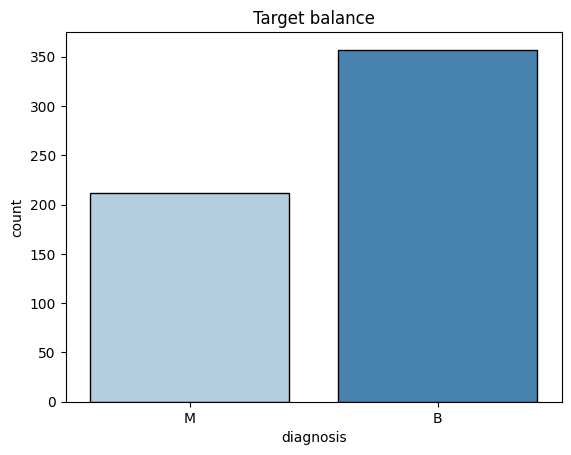

In [252]:
sns.countplot(data = data, x = "diagnosis", 
              edgecolor = 'k', palette = PALETTE)
plt.title("Target balance");

In [253]:
rate = round(data.diagnosis.value_counts().iloc[0] / data.diagnosis.value_counts().iloc[1], 2)
print(f"Target rate: 1:{rate}")

Target rate: 1:1.68


In [254]:
data.groupby("diagnosis").mean().T.style.highlight_max(subset = None,
                                                       color = 'lightgreen',
                                                       axis = 1, props = None)

diagnosis,B,M
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


In a broader perspective, there exists a notable correlation between higher values of the features and malignancy in diagnoses. This observation carries significant implications, particularly when considering the potential decision of discretizing the data. This deliberation revolves around the possibility of achieving improved outcomes through data discretization.

However, the decision to discretize should be approached thoughtfully, considering trade-offs between granularity and information loss. Striking the right balance is crucial; overly aggressive discretization can lead to a loss of important information. Therefore, this strategic decision hinges on the careful consideration of the observed association between higher feature values and malignancy, while also accounting for the broader context of the dataset and the specific needs of the classification task.

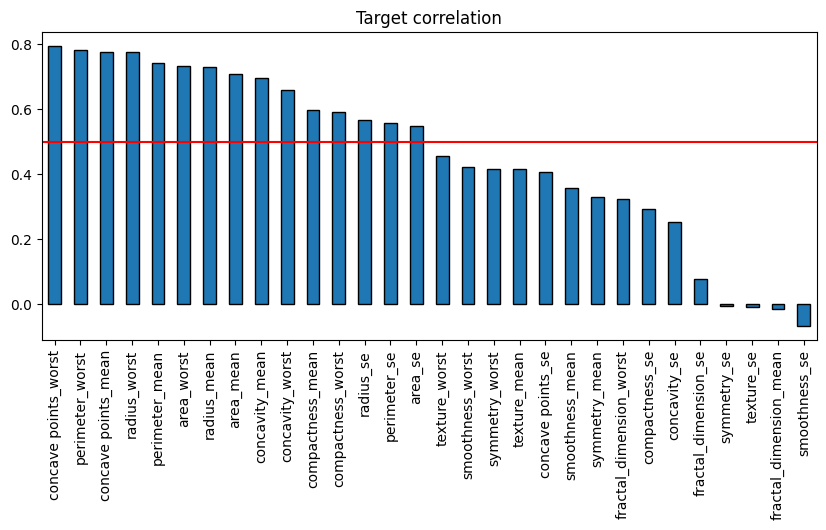

In [255]:
temp = data.copy()
temp['diagnosis'] = temp['diagnosis'].map({"B":0, "M":1})

temp.corr()['diagnosis'].sort_values(ascending = False)[1:].plot(kind = 'bar',
                                                                 edgecolor = 'k',
                                                                figsize = (10, 4))
plt.axhline(0.5, c = 'r')
plt.grid(False)
plt.title("Target correlation");

On a comprehensive scale, it becomes evident that a substantial proportion of the features indeed exhibit significant correlations with the distinction between malignant and non-malignant cases. This revelation holds crucial implications, particularly for the potential refinement of our predictive model. The prevalence of these correlations suggests that our model could potentially produce predictions that are less biased, steering toward a more accurate representation of the actual medical scenario.

## Correlated Predictors
Overall analisis of all the predictors.

In [256]:
import pandas as pd

# Select numeric columns from your DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
temp = numeric_data.corr().abs()

HighlyCorrelated = list()

for feature in temp.columns:
    for index, value in enumerate(temp[feature].values):
        if value > 0.90:
            correlated = [feature, temp.index[index]]
            if correlated[::-1] not in HighlyCorrelated and correlated[0] != correlated[1]:
                HighlyCorrelated.append(correlated)

In [257]:
def plot_pais(pair,data = data, correlations = HighlyCorrelated):
    
    fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (13, 4))
    
    sns.scatterplot(data = data, x = pair[0], y = pair[1], hue = "diagnosis",
                    palette = PALETTE, edgecolor = 'k', ax = ax1)
    ax1.set_title(f"{pair[0]} vs. {pair[1]}")
    ax1.grid(False)
    
    sns.scatterplot(data = data, x = correlations[correlations.index(pair) + 1][0],
                    y = correlations[correlations.index(pair) + 1][1], hue = "diagnosis",
                    palette = PALETTE, edgecolor = 'k', ax = ax2)
    ax2.set_title(f"{correlations[correlations.index(pair) + 1][0]} vs. {correlations[correlations.index(pair) + 1][1]}")
    ax2.grid(False)
    
    sns.scatterplot(data = data, x = correlations[correlations.index(pair) + 2][0],
                    y = correlations[correlations.index(pair) + 2][1], hue = "diagnosis",
                    palette = PALETTE, edgecolor = 'k', ax = ax3)
    
    ax3.set_title(f"{correlations[correlations.index(pair) + 2][0]} vs. {correlations[correlations.index(pair) + 2][1]}")
    ax3.grid(False)
    
    plt.tight_layout();

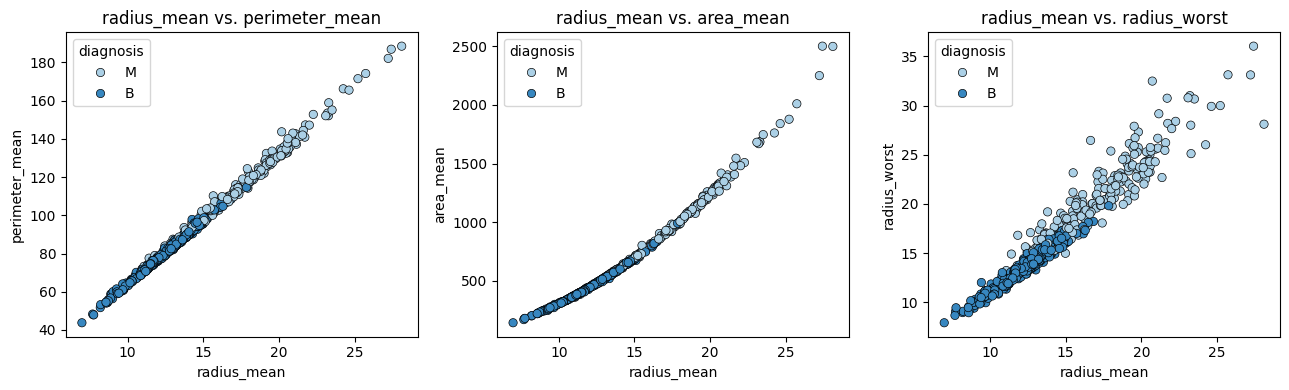

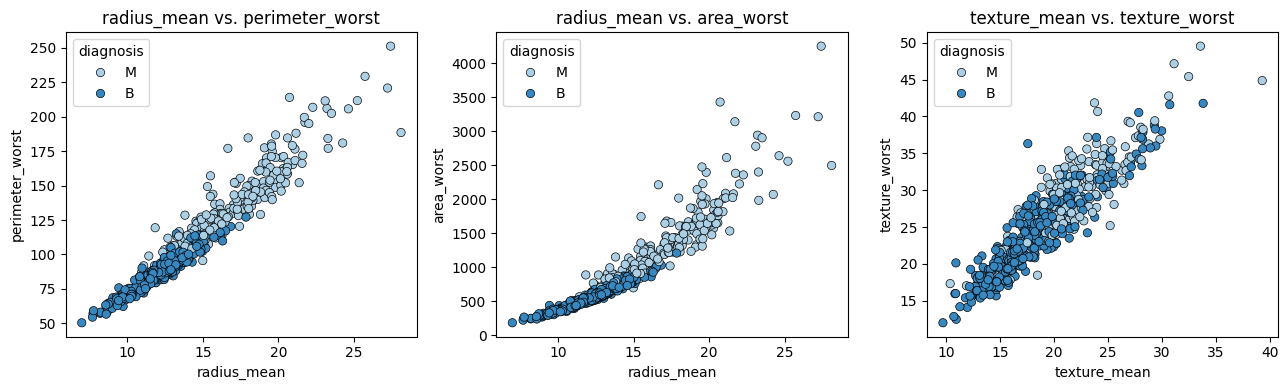

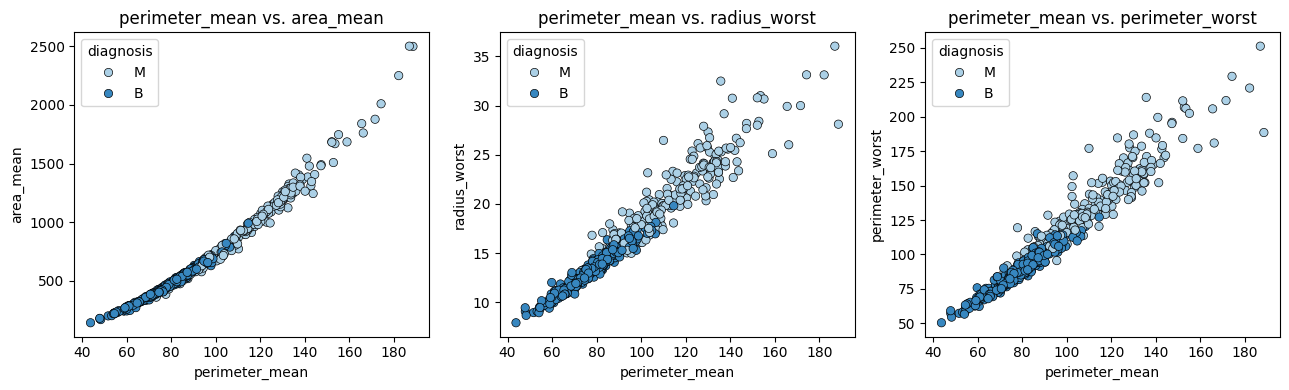

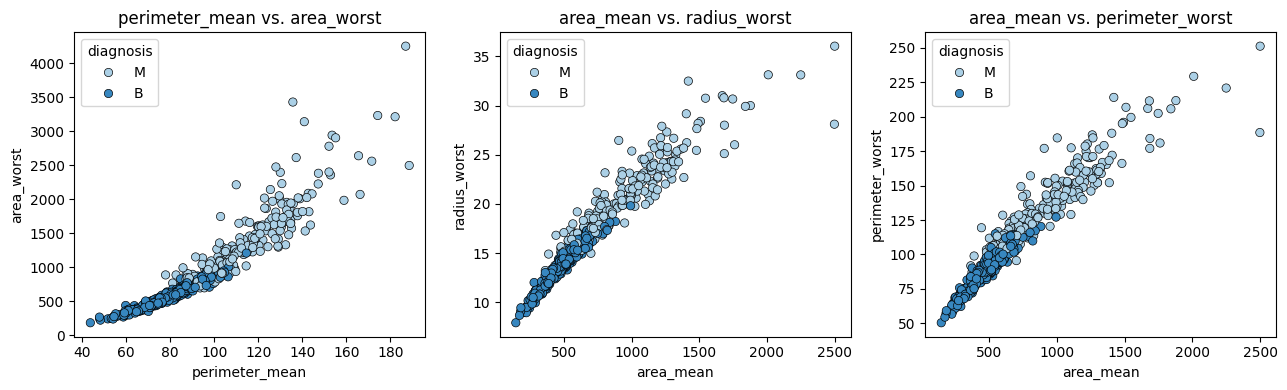

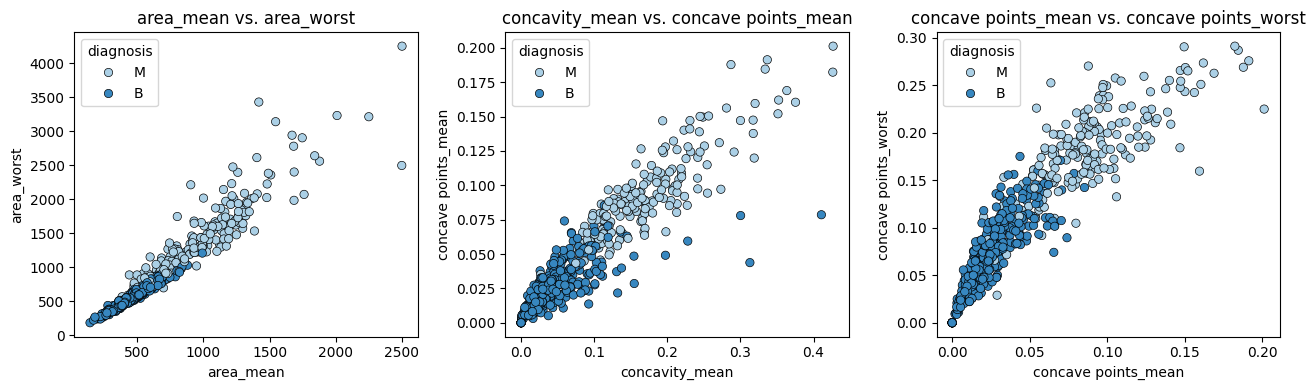

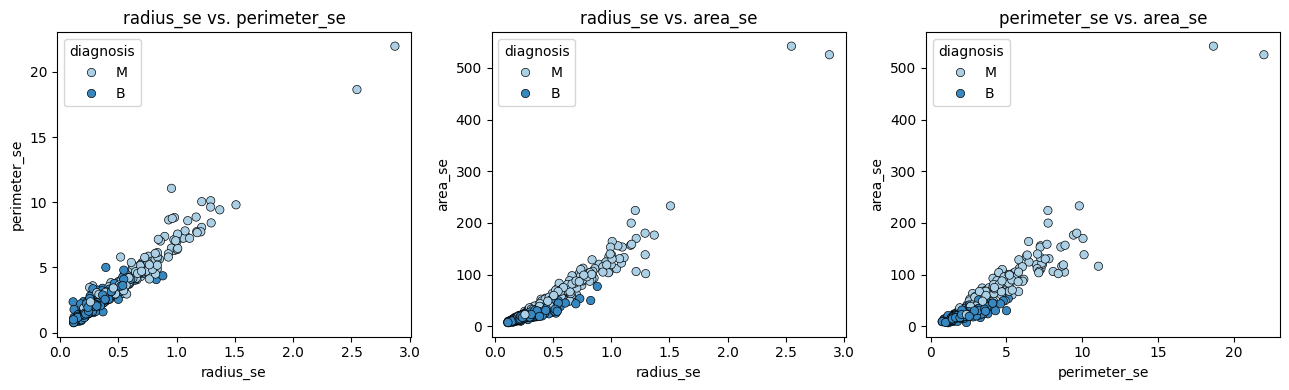

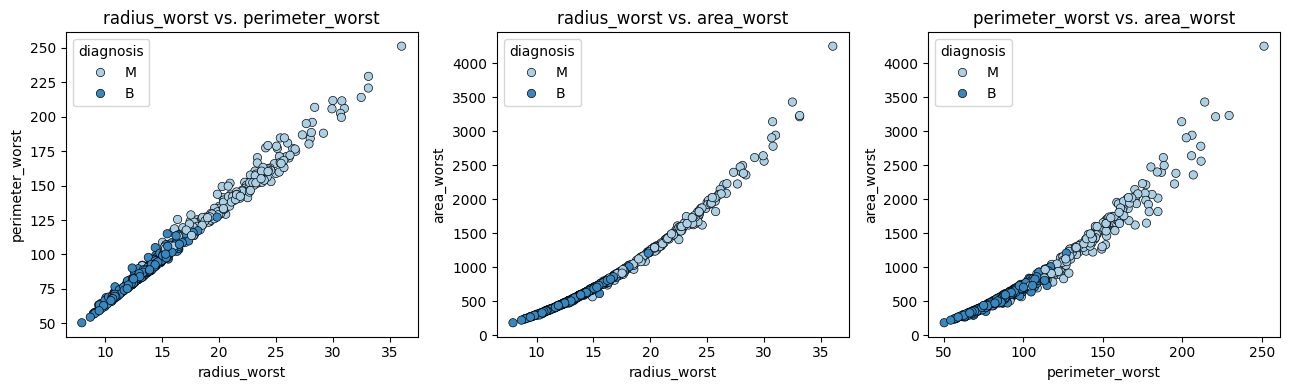

In [258]:
for index in range(0, len(HighlyCorrelated), 3):
    
    plot_pais(pair = HighlyCorrelated[index])

The patterns emerging from our data analysis are quite revealing. It's apparent that variables exhibiting correlations exceeding 0.90 display a pronounced linear relationship. This implies that as one variable, denoted as X, increases, another variable (Y) follows suit. This linear dependency holds significant promise for machine learning models, as many algorithms leverage precisely this kind of strong correlation to enhance predictive accuracy. 

This linear relationship aligns harmoniously with the principles of machine learning, potentially simplifying the modeling process and yielding more robust results. A noteworthy observation highlighted in the recent charts is the consistent trend: higher values across various pairs of features with 0.90 or higher correlations correspond to an increased likelihood of a malign diagnosis. This consistent pattern adds an extra layer of validation to our findings, reinforcing the potential relevance of these correlated features.

In light of these compelling insights, I am poised to place a concentrated emphasis on those features exhibiting robust correlations with the target variable. This strategic focus doesn't entail sidelining other features; rather, it reflects a deliberate choice to harness the predictive strength of these correlated features. The decision to prioritize these features stems from their demonstrated capacity to contribute meaningfully to diagnosis prediction.

It's important to note that while other features might not boast similarly high correlations with the target, they can still play valuable roles in the modeling process. They might enhance the predictive capabilities of other variables or contribute to the model's overall stability. Thus, retaining these features in the dataset is paramount, as they can contribute to the broader predictive framework. As we proceed, we'll delve further into the analysis of these potent predictors, while keeping a holistic view of the dataset's potential.

## Target correlations

An exploration of the features that exhibit higher correlations with our target variable entails both univariate and multivariate analysis. This two-fold approach aims to comprehensively understand the individual and collective impacts of these influential features on the target variable.

In [259]:
temp = data.copy()
temp['diagnosis'] = temp['diagnosis'].map({"B":0, "M":1})

TargetCorreltions = temp.corr()['diagnosis'].sort_values(ascending = False)[1:].head(15).to_frame()
TargetCorreltions[::-1]

,diagnosis
area_se,0.548236
perimeter_se,0.556141
radius_se,0.567134
compactness_worst,0.590998
compactness_mean,0.596534
concavity_worst,0.659610
concavity_mean,0.696360
area_mean,0.708984
radius_mean,0.730029
area_worst,0.733825


### area_se, perimeter_se and radius_se

In the context of breast cancer analysis, the features "area_se," "perimeter_se," and "radius_se" refer to measurements derived from digitized images of fine needle aspirates (FNAs) of breast masses. These features offer insights into various aspects of cell nuclei characteristics, aiding in the differentiation between benign and malignant cases.

1. **area_se (Area Standard Error):** This feature quantifies the variability or uncertainty in the measurements of cell nucleus areas. A higher "area_se" value suggests greater variability in cell nucleus areas, which might indicate irregularities in cell size and shape. In the context of breast cancer, increased variability could be associated with malignancy, as cancer cells often exhibit irregular and diverse sizes.

2. **perimeter_se (Perimeter Standard Error):** "Perimeter_se" captures the standard error in the measurements of cell nucleus perimeters. Similar to "area_se," higher values indicate greater variability in cell nucleus perimeters. Irregular perimeters might correlate with abnormal cell growth patterns, which can be indicative of malignancy.

3. **radius_se (Radius Standard Error):** This feature represents the standard error of cell nucleus radius measurements. A larger "radius_se" value suggests higher variability in cell nucleus radii, which can be linked to variations in cell sizes. In breast cancer analysis, irregular cell sizes can be indicative of cancerous growth, potentially leading to a malignant diagnosis.

Collectively, these three features—area_se, perimeter_se, and radius_se—contribute to the characterization of cell nuclei properties. Their variability measurements provide insights into the irregularities present within the cellular structures observed in the breast mass images. The distinct aspects of variability they capture offer valuable information for diagnosing and distinguishing between benign and malignant cases, enriching the overall diagnostic process in breast cancer analysis.

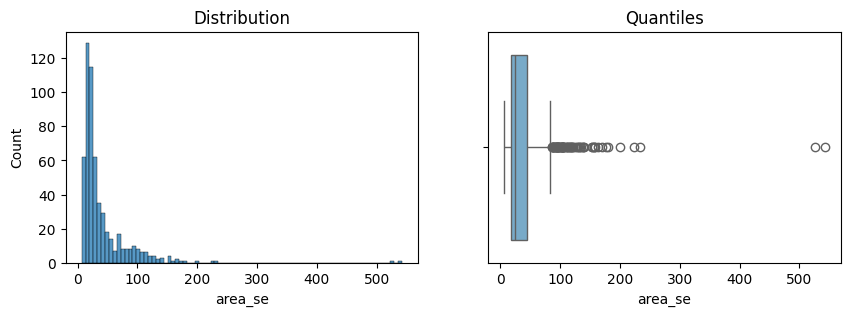

In [260]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))

sns.histplot(data = data, x = "area_se", ax = ax1, palette = PALETTE)
sns.boxplot(data = data, x = "area_se", ax = ax2, palette = PALETTE)
ax1.grid(False)
ax1.set_title("Distribution")
ax2.grid(False)
ax2.set_title("Quantiles");

What stands out upon visual inspection is that the feature "area_se" exhibits a presence of outliers. It's important to recall that our objective is to identify cases with a lower "area_se," as this corresponds to a higher level of confidence in the diagnosis. Given this context, our attention might be directed towards instances with lower "area_se" values.

Effectively, the presence of outliers within "area_se" doesn't substantially influence our analysis, as we are primarily interested in the lower end of the distribution. Outliers might simply reflect variations that don't align with our diagnostic objective. By acknowledging this aspect, we ensure that our analysis remains focused on the relevant range of values and doesn't get sidetracked by the outliers that don't directly contribute to our specific diagnostic aim.

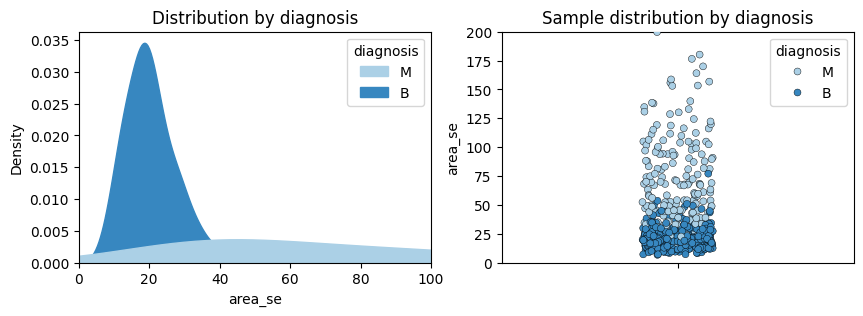

In [261]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))

sns.kdeplot(data = data, x = "area_se", hue = "diagnosis", alpha = 1,
            fill = True, ax = ax1, palette = PALETTE)
sns.stripplot(data = data, y = "area_se", hue = "diagnosis", ax = ax2,
              linewidth = 0.3, edgecolor = 'k', palette = PALETTE);
ax1.grid(False)
ax1.set_title("Distribution by diagnosis")
ax1.set_xlim(0, 100)
ax2.grid(False)
ax2.set_title("Sample distribution by diagnosis")
ax2.set_ylim(0, 200);

The observation that a less precise "area" measurement is associated with a higher likelihood of a malignant diagnosis holds significance. While this observation might not possess standalone utility, its value becomes amplified when considered in conjunction with other influential features.

The "area_se" feature, reflecting the standard error of the area, carries the potential to contribute essential information to our model. When coupled with other pertinent features that exert a more substantial impact on diagnosis, "area_se" gains the power to elucidate nuanced distinctions that might otherwise remain concealed. In essence, it becomes a valuable piece of the diagnostic puzzle.

#### area_se into perimeter_se and radius_se

In a manner akin to the diagnostic target, both "perimeter_se" and "radius_se" exhibit notable correlations with the "area_se" feature. This correlation can be attributed to the inherent similarity in the nature of these parameters when applied to diagnostic measurement.

The rationale behind this correlation is rather intuitive. "Perimeter_se" and "radius_se" share fundamental attributes with "area_se" in the context of measuring diagnostic characteristics. Just as "area_se" relates to the extent of variation in area measurements, "perimeter_se" pertains to the analogous variations in perimeter measurements, while "radius_se" mirrors this trend by encompassing variations in radius measurements.

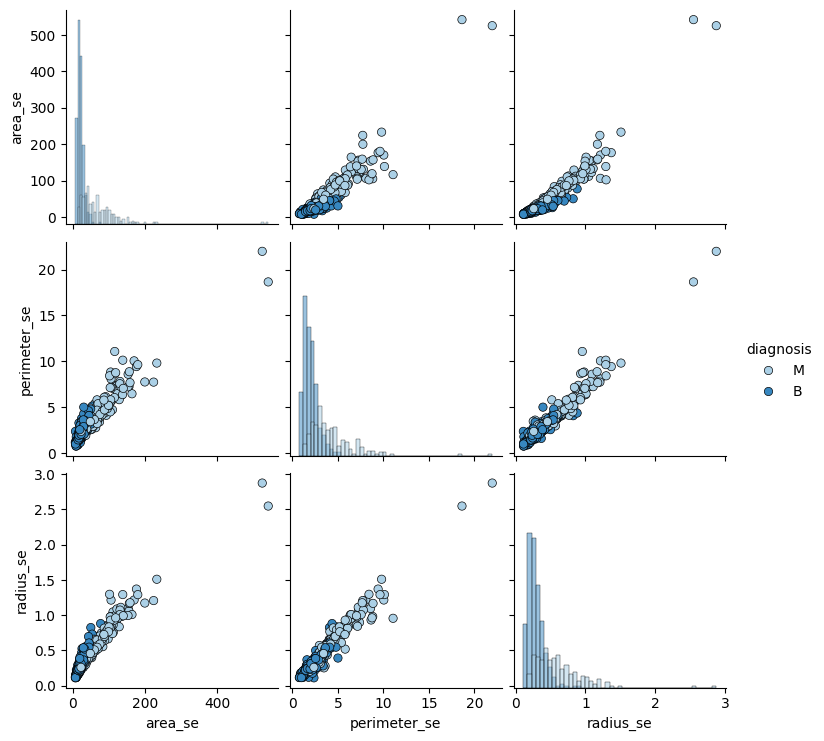

In [262]:
sns.pairplot(data = data, vars = ["area_se", "perimeter_se", "radius_se"],
            hue = "diagnosis", palette = PALETTE, plot_kws = {"edgecolor":"k"},
             diag_kind = "hist");

As anticipated, the observed patterns persist, unveiling a well-defined linear relationship. This relationship consistently portrays a pronounced distribution skewed towards benign cases in lower values, while higher values are indicative of malignancy. It's crucial to bear in mind that these measurements directly correspond to the parameters of the performed diagnostic tests.

In light of these findings, a compelling avenue of exploration lies in comparing both the mean and the standard error (se) in tandem. By juxtaposing these two statistical measures, we aim to ascertain whether they collectively narrate the diagnostic story we are in pursuit of.

The juxtaposition of mean and standard error presents a multifaceted perspective. While the mean offers an aggregate view of central tendency, the standard error provides insight into the precision of this estimate. When combined, they convey not only the diagnostic tendencies represented by the mean but also the degree of confidence or variability inherent in that representation.

This approach adds a layer of depth to our understanding, facilitating a more comprehensive interpretation of the diagnostic characteristics encapsulated within these parameters. By delving into both the mean and the standard error, we strive to extract a richer narrative from the data, further enriching our capacity to discern the diagnostic nuances embedded within these measurements.

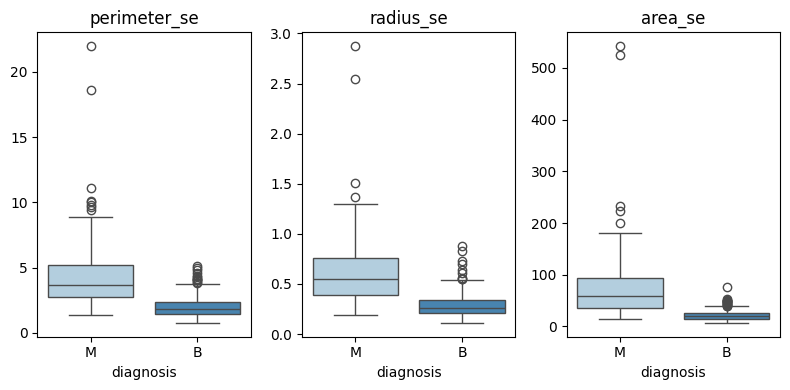

In [263]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (8, 4))

sns.boxplot(data = data, y = "perimeter_se", x = "diagnosis", ax = ax1, palette = PALETTE)
ax1.set_ylabel("")
ax1.set_title("perimeter_se")
sns.boxplot(data = data, y = "radius_se", x = "diagnosis", ax = ax2, palette = PALETTE)
ax2.set_ylabel("")
ax2.set_title("radius_se")
sns.boxplot(data = data, y = "area_se", x = "diagnosis", ax = ax3, palette = PALETTE)
ax3.set_ylabel("")
ax3.set_title("area_se")
plt.tight_layout();

In [264]:
data.groupby("diagnosis").mean()[["perimeter_se", "radius_se", "area_se"]].T

diagnosis,B,M
perimeter_se,2.000321,4.323929
radius_se,0.284082,0.609083
area_se,21.135148,72.672406


## area_mean, perimeter_mean and radius_mean

In the context of breast cancer analysis, the features "area_mean," "perimeter_mean," and "radius_mean" correspond to measurements derived from digitized images of fine needle aspirates (FNAs) of breast masses. These features provide crucial insights into the characteristics of cell nuclei, aiding in the differentiation between benign and malignant cases.

1. **area_mean (Mean Area):** The "area_mean" feature represents the average size of cell nuclei observed in the images. A larger "area_mean" value indicates larger cell nuclei, which could be associated with abnormal cell growth patterns, potentially suggesting malignancy. This feature captures variations in the sizes of cell nuclei within the breast mass.

2. **perimeter_mean (Mean Perimeter):** "Perimeter_mean" quantifies the average perimeter or boundary length of cell nuclei. A higher value implies that the cell nuclei tend to have larger boundaries, which could be indicative of irregular cell shapes and potential malignancy. This feature offers insights into the overall shapes of cell nuclei present in the images.

3. **radius_mean (Mean Radius):** "Radius_mean" represents the average distance from the nucleus center to its boundary. Larger "radius_mean" values suggest that cell nuclei tend to be larger, potentially signaling abnormal growth. Like the other features, variations in this measurement can provide valuable information about the cellular structure within the breast mass.

These three features—area_mean, perimeter_mean, and radius_mean—collectively capture different aspects of cell nucleus characteristics. Their averages offer essential information about cell size, shape, and boundary characteristics. By analyzing these features, clinicians and researchers gain insights into the underlying cellular dynamics, aiding in the identification of potentially malignant cases in breast cancer diagnosis.

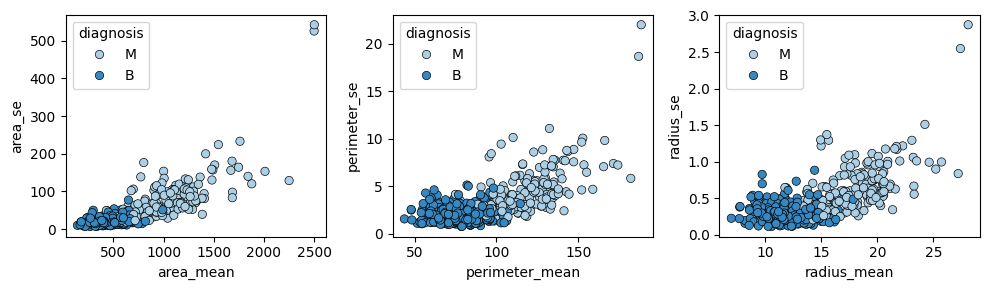

In [265]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.scatterplot(data = data, x = "area_mean", y = "area_se",
                hue = "diagnosis", palette = PALETTE, edgecolor = 'k', ax = ax1)


sns.scatterplot(data = data, x = "perimeter_mean", y = "perimeter_se",
                hue = "diagnosis", palette = PALETTE, edgecolor = 'k', ax = ax2)

sns.scatterplot(data = data, x = "radius_mean", y = "radius_se",
                hue = "diagnosis", palette = PALETTE, edgecolor = 'k', ax = ax3)

plt.tight_layout();

The intention behind this visualization is not necessarily to uncover new insights, but rather to serve as a means of validation. Its purpose is to verify the consistency and accuracy of the measurement methods employed. By visually confirming that the values align and no anomalies are apparent within the measurement techniques, we establish a foundational assurance that the data's integrity is intact.

As we proceed, our emphasis shifts toward a more specific objective: investigating the correlation between the measurement means and the actual target variable. This analytical direction holds substantial significance, as it aims to unearth potential relationships that might contribute to the diagnostic process.

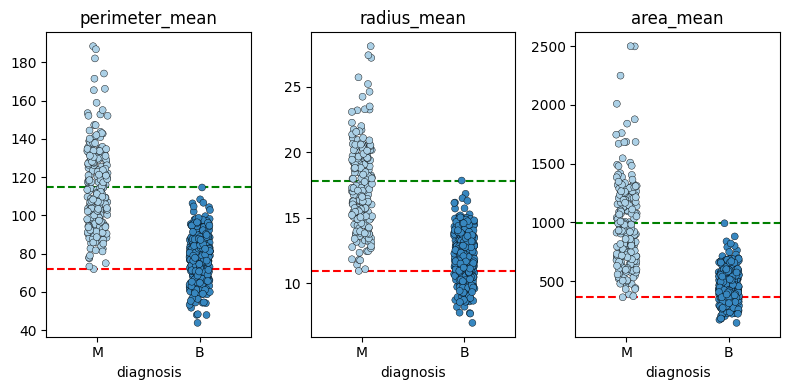

In [266]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (8, 4))

sns.stripplot(data = data, y = "perimeter_mean", x = "diagnosis", ax = ax1, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax1.set_ylabel("")
ax1.set_title("perimeter_mean")
ax1.axhline(data[data['diagnosis'] == 'B']['perimeter_mean'].max(), color = 'g', ls = '--')
ax1.axhline(data[data['diagnosis'] == 'M']['perimeter_mean'].min(), color = 'r', ls = '--')
sns.stripplot(data = data, y = "radius_mean", x = "diagnosis", ax = ax2, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax2.set_ylabel("")
ax2.set_title("radius_mean")
ax2.axhline(data[data['diagnosis'] == 'B']['radius_mean'].max(), color = 'g', ls = '--')
ax2.axhline(data[data['diagnosis'] == 'M']['radius_mean'].min(), color = 'r', ls = '--')

sns.stripplot(data = data, y = "area_mean", x = "diagnosis", ax = ax3, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax3.set_ylabel("")
ax3.set_title("area_mean")
ax3.axhline(data[data['diagnosis'] == 'B']['area_mean'].max(), color = 'g', ls = '--')
ax3.axhline(data[data['diagnosis'] == 'M']['area_mean'].min(), color = 'r', ls = '--')
plt.tight_layout();

The pattern observed in the mean values mirrors the trend we've seen before: benign diagnoses correspond to lower mean values, while malignant cases are associated with higher mean values. However, a notable distinction emerges when compared to the earlier analysis of standard error. In this instance, the relationship between mean values and diagnosis is not as consistently smooth. This divergence is due to both benign and malignant diagnoses having a concentration of quantiles in the same range within each analysis.

This phenomenon reveals a more nuanced relationship between mean values and diagnosis, suggesting that the distinction between benign and malignant cases might not be as straightforward as when considering standard error. The presence of overlapping quantiles indicates that there could be overlaps in the distributions of mean values for both diagnoses.

Interestingly, the combined utilization of mean and standard error as predictors in modeling holds the potential to yield substantial predictive power. The standard error provides insights into the precision of the mean estimates, offering a complementary layer of information. However, it's crucial to note that relying solely on standard error or mean alone might not yield the optimal results we might anticipate. The intricacies of the relationships, as highlighted by the distinct behaviors of mean and standard error, underscore the need for a more holistic approach that leverages both of these features in conjunction. By integrating these measures intelligently, we can potentially enhance the accuracy and effectiveness of our predictive models.

### compactness_worst, compactness_mean and compactness_se

In the context of breast cancer analysis, the features "compactness_worst," "compactness_mean," and "compactness_se" pertain to measurements derived from digitized images of fine needle aspirates (FNAs) of breast masses. These features offer insights into the compactness characteristics of cell nuclei, contributing to the differentiation between benign and malignant cases.

1. **compactness_worst (Worst Compactness):** This feature quantifies the compactness of cell nuclei in the worst case scenario within the image. Higher "compactness_worst" values suggest that cell nuclei tend to have a more irregular shape and boundary, which could indicate abnormal cell growth patterns linked to malignancy. A higher compactness often corresponds to a more complex and irregular shape.

2. **compactness_mean (Mean Compactness):** "Compactness_mean" represents the average compactness of cell nuclei within the image. A higher value could imply that the cell nuclei are relatively more irregular in shape and boundary. This feature provides insights into the overall compactness tendencies of the nuclei present in the breast mass images.

3. **compactness_se (Compactness Standard Error):** "Compactness_se" captures the variability or uncertainty in the measurements of compactness. Higher "compactness_se" values suggest greater variability in the compactness of cell nuclei, indicating potential irregularities in their shapes. Irregularities in cell shape could be associated with malignancy.

Collectively, these three features—compactness_worst, compactness_mean, and compactness_se—contribute to the characterization of cell nucleus compactness. Their measurements offer valuable information about the irregularities and complexities within the cellular structures observed in the breast mass images. By analyzing these features, clinicians and researchers gain insights into the underlying cellular properties, aiding in the identification of potentially malignant cases in breast cancer diagnosis.

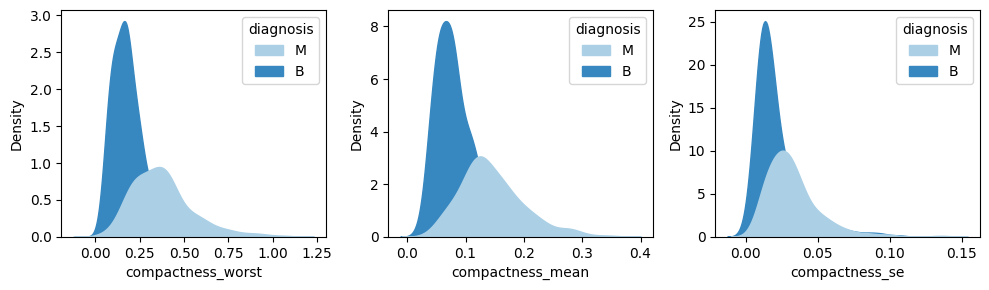

In [267]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.kdeplot(data = data, x = "compactness_worst", hue = "diagnosis", alpha = 1,
                fill = True, ax = ax1, palette = PALETTE)

sns.kdeplot(data = data, x = "compactness_mean", hue = "diagnosis", alpha = 1,
                fill = True, ax = ax2, palette = PALETTE)

sns.kdeplot(data = data, x = "compactness_se", hue = "diagnosis", alpha = 1,
                fill = True, ax = ax3, palette = PALETTE)

plt.tight_layout()

Visualizing all the compactness-related features in relation to the diagnosis reveals a consistent and striking pattern across each feature. This observation vividly underscores the remarkable accuracy achieved in diagnostic systems and the impressive strides made by researchers in enhancing their efficiency.

The coherence in patterns observed across these compactness features serves as a tangible testament to the precision of diagnostic outcomes. The similarity in how the features unfold in relation to benign and malignant cases underscores the power of these measurements in distinguishing between the two categories. This cohesiveness bolsters the confidence in diagnostic accuracy, offering clinicians and researchers a reliable tool to identify and categorize cases effectively.

In [268]:
from sklearn.preprocessing import MinMaxScaler

temp = data[["compactness_worst", "area_worst", "radius_worst", "perimeter_worst", "diagnosis"]]

temp[["compactness_worst", "area_worst", "radius_worst", "perimeter_worst"]] = MinMaxScaler().fit_transform(temp[["compactness_worst", "area_worst", "radius_worst", "perimeter_worst"]])  

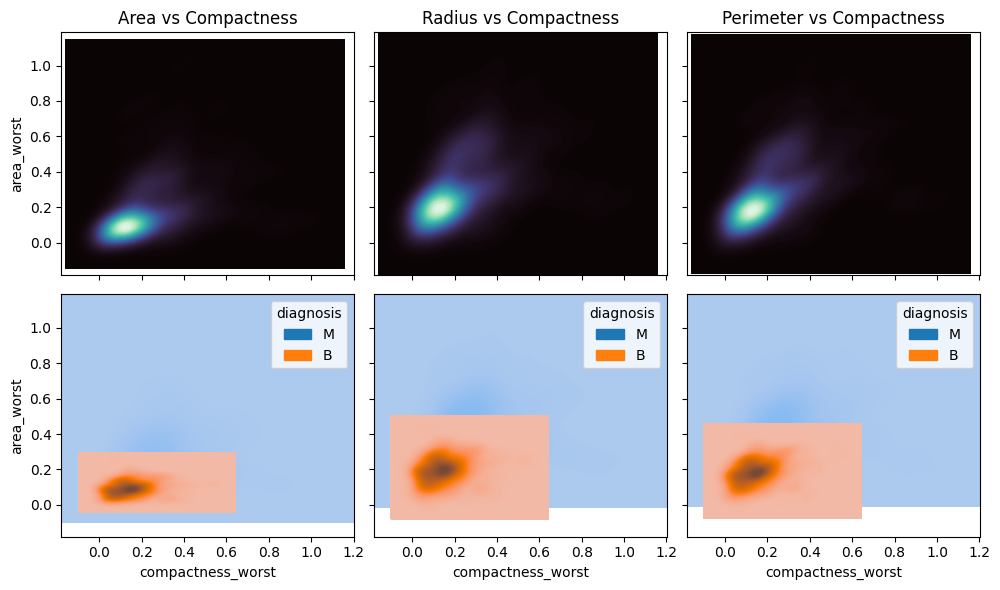

In [269]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2, figsize = (10, 6), sharey = True, sharex = True)

sns.kdeplot(data = temp, x = "compactness_worst", y = "area_worst",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax1)
ax1.set_title("Area vs Compactness")

sns.kdeplot(data = temp, x = "compactness_worst", y = "radius_worst",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax2)
ax2.set_title("Radius vs Compactness")

sns.kdeplot(data = temp, x = "compactness_worst", y = "perimeter_worst",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax3)
ax3.set_title("Perimeter vs Compactness")

sns.kdeplot(data = temp, x = "compactness_worst", y = "area_worst",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax4, hue = "diagnosis")
sns.kdeplot(data = temp, x = "compactness_worst", y = "radius_worst",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax5, hue = "diagnosis")
sns.kdeplot(data = temp, x = "compactness_worst", y = "perimeter_worst",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax6, hue = "diagnosis")

plt.tight_layout();

Upon scaling the worst values associated with the principal features, a recurring pattern emerges across various dimensions. This consistent pattern provides a glimpse into the inherent relationships among these features. When further segmenting the data by diagnosis, an intriguing observation takes shape: the area of benign diagnoses aligns across all these features. This consistency in the area of benign diagnoses across multiple dimensions holds notable significance. It enables us to conceptualize these areas as regions of both "safe" and "hazardous" zones extending beyond them. Essentially, the consistent area observed in benign cases serves as a reference point, delineating a region within which most benign cases tend to cluster.

This interpretation carries valuable implications for diagnosis and decision-making. The "area" demarcated by benign diagnoses represents a reference zone where healthy patterns are concentrated. Beyond this reference zone, variations might indicate potential malignancy or irregularities. This "dangerous" zone beyond the reference area warrants careful attention, as deviations from the established benign patterns might serve as indicators of abnormal cellular characteristics.

### concavity_mean, concavity_se and concavity_worst

In the realm of breast cancer analysis, the features "concavity_mean," "concavity_se," and "concavity_worst" correspond to measurements obtained from digitized images of fine needle aspirates (FNAs) of breast masses. These measurements provide valuable insights into the concavity attributes of cell nuclei, which play a crucial role in discerning between benign and malignant cases.

1. **concavity_mean (Mean Concavity):** This feature quantifies the average degree of concavity observed in cell nuclei within the image. Elevated values of "concavity_mean" suggest that the cell nuclei exhibit deeper and more pronounced concavities. Such findings might be indicative of certain irregularities in cellular structure that can be associated with malignancy. Increased concavity could reflect changes in the shape and texture of cell nuclei, potentially linked to cancerous growth.

2. **concavity_se (Concavity Standard Error):** "Concavity_se" captures the variability or uncertainty in the measurements of concavity. Higher "concavity_se" values imply greater variability in the degree of concavity observed among cell nuclei. This variability might signal irregularities or complexities in cellular morphology, which could relate to cancerous changes.

3. **concavity_worst (Worst Concavity):** This feature quantifies the most significant degree of concavity found within the image, considering worst-case scenarios. Elevated "concavity_worst" values indicate that in the instances with the most pronounced concavities, the cell nuclei tend to exhibit more profound irregularities. This heightened concavity might correspond to characteristics associated with malignant cellular growth patterns.

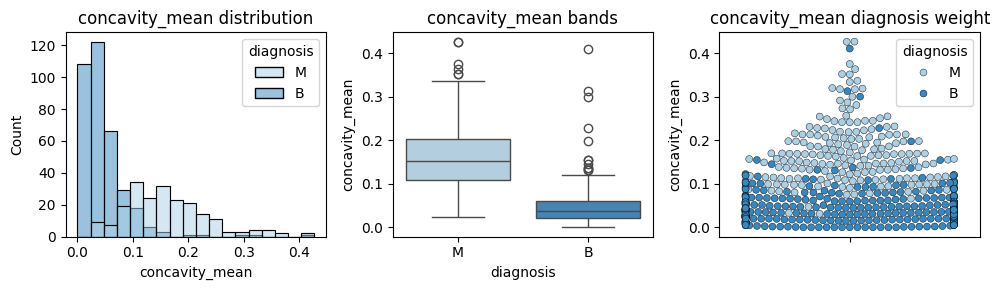

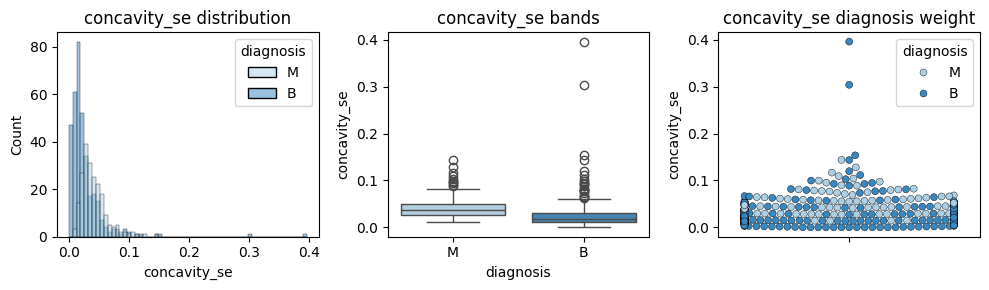

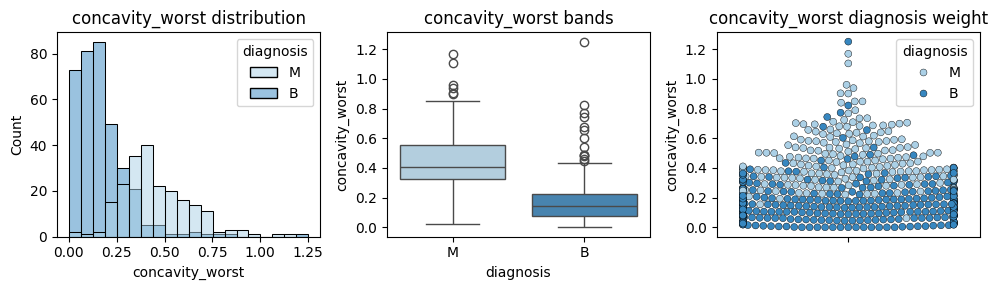

In [270]:
for feature in ["concavity_mean", "concavity_se", "concavity_worst"]:
    
    fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))
    
    sns.histplot(data = data, x = feature, ax = ax1, hue = "diagnosis", palette = PALETTE)
    ax1.set_title(f"{feature} distribution")
    sns.boxplot(data = data, y = feature, ax = ax2, x = "diagnosis", palette = PALETTE)
    ax2.set_title(f"{feature} bands")
    sns.swarmplot(data = data, y = feature, ax = ax3, hue = "diagnosis", palette = PALETTE,
                  edgecolor = "k", linewidth = 0.3)
    ax3.set_title(f"{feature} diagnosis weight")
    
    plt.tight_layout()

When it comes to examining concavity characteristics, the distinct pattern where lower values unequivocally correlate with benign diagnoses and higher values align with malignant diagnoses seems to dissipate. Particularly, this shift is evident in the variation of concavity measures, with concavity_se showing a minimal difference that is barely perceptible. It's important to underscore that these measures encapsulate the level of confidence in our assessments. The minimal disparity observed in concavity_se highlights the nuanced nature of this particular feature's influence. A noteworthy aspect to consider is that these values are essentially indicators of confidence in the diagnoses. The closer these values are to one another, especially in the case of concavity_se, the more challenging it becomes to effectively differentiate between the diagnostic outcomes. Importantly, while these values alone may not readily predict the variations between benign and malignant cases, they play a different role in the grand scheme.

Indeed, these values aren't meant to stand alone as sole predictors. Rather, they serve as weights, combined with other pivotal features, in the construction of predictive models. Their role extends beyond mere prediction; they contribute to the collective assessment of patient cases. While they might not distinctly aid in predicting differences, they possess the potential to amplify the predictive capabilities of other essential features. In essence, while the individual impact of these concavity values might not be immediately apparent, their collective role as part of a larger ensemble contributes to the multifaceted process of diagnostic modeling. This intricate interplay underscores the complexity of data-driven diagnosis, where features work in tandem, complementing each other to yield more informed and accurate predictions.

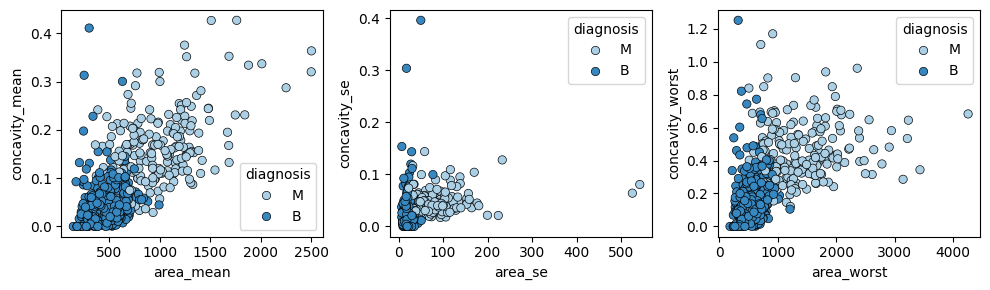

In [271]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.scatterplot(data = data, x = "area_mean", y = "concavity_mean",
                hue = "diagnosis", ax = ax1, palette = PALETTE, edgecolor = 'k')

sns.scatterplot(data = data, x = "area_se", y = "concavity_se",
                hue = "diagnosis", ax = ax2, palette = PALETTE, edgecolor = 'k')

sns.scatterplot(data = data, x = "area_worst", y = "concavity_worst",
                hue = "diagnosis", ax = ax3, palette = PALETTE, edgecolor = 'k')

plt.tight_layout();

As we observe the plot combining the concavity feature with other highly correlated features, particularly in this instance, area, an interesting pattern becomes evident. This pattern exhibits a remarkable degree of consistency, indicating that the concavity feature holds notable predictive potency. This phenomenon isn't exclusive to the realm of medical scenarios; it's a characteristic often observed in natural features. In the landscape of machine learning, it's quite common for not all features to exhibit high correlations with the target variable.

The pronounced and consistent pattern witnessed in this visualization underscores the intrinsic relationships embedded within the data. This consistency provides insight into the predictive power encapsulated within the concavity feature when combined with other influential variables, such as area. This synergy allows the model to harness these features' collective information to make more accurate predictions.

This scenario, where certain features exhibit stronger predictive capabilities than others, is a natural facet of data analysis. Just as in nature, not all variables possess equal importance or relevance to the target outcome. Recognizing this diversity in feature strengths enhances our understanding of the data and underscores the need for careful feature selection in model development. It emphasizes the importance of a nuanced approach in which each feature's contribution is thoughtfully considered, ultimately culminating in a more robust and accurate predictive model.

### concave points_mean, concave points_se and concave points_worst

In the context of the analysis of breast cancer, the features "concave points_mean," "concave points_se," and "concave points_worst" correspond to measurements extracted from digitized images of fine needle aspirates (FNAs) of breast masses. These measurements provide valuable insights into the characteristics of concave points found within the cell nuclei, contributing to the differentiation between benign and malignant cases.

1. **concave points_mean (Mean Concave Points):** This feature quantifies the average count of concave points observed within the cell nuclei present in the image. Elevated values of "concave points_mean" suggest that the cell nuclei tend to display a higher number of concave regions. This observation may imply a greater intricacy in cell shapes, offering insights into the complexities of cellular structures within the breast mass images.

2. **concave points_se (Concave Points Standard Error):** "Concave points_se" encompasses the variability or uncertainty associated with the measurements of concave points. Higher values of "concave points_se" indicate increased variability in the count of concave points among cell nuclei. Variations in the number of concave points could signify irregularities in cellular morphology, which might relate to malignancy.

3. **concave points_worst (Worst Concave Points):** This feature quantifies the highest count of concave points observed within the image, considering the scenario with the most pronounced concave points. Elevated "concave points_worst" values indicate that, in instances with the most prominent concave points, cell nuclei tend to exhibit more intricate and complex shapes. These pronounced concave points might correspond to characteristics associated with malignant cellular attributes.

Together, these three features—concave points_mean, concave points_se, and concave points_worst—provide valuable insights into the presence and variation of concave points within cell nuclei. By analyzing these features, healthcare professionals and researchers gain a deeper understanding of cellular intricacies present in breast mass images. This comprehension aids in the identification of potential malignancies, thereby enhancing diagnostic precision in the field of breast cancer assessment.

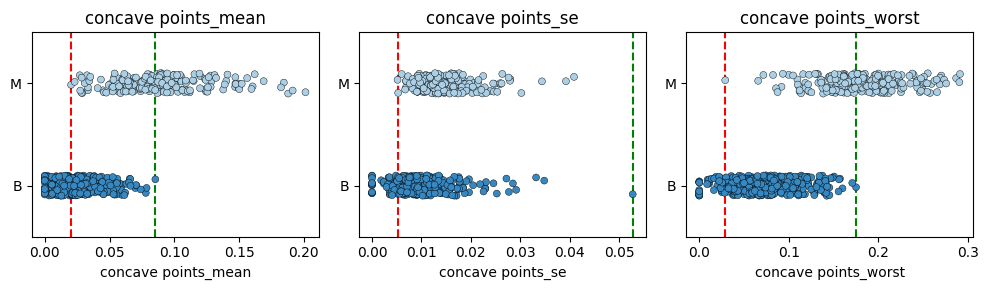

In [272]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.stripplot(data = data, x = "concave points_mean", y = "diagnosis", ax = ax1, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax1.set_ylabel("")
ax1.set_title("concave points_mean")
ax1.axvline(data[data['diagnosis'] == 'B']['concave points_mean'].max(), color = 'g', ls = '--')
ax1.axvline(data[data['diagnosis'] == 'M']['concave points_mean'].min(), color = 'r', ls = '--')

sns.stripplot(data = data, x = "concave points_se", y = "diagnosis", ax = ax2, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax2.set_ylabel("")
ax2.set_title("concave points_se")
ax2.axvline(data[data['diagnosis'] == 'B']['concave points_se'].max(), color = 'g', ls = '--')
ax2.axvline(data[data['diagnosis'] == 'M']['concave points_se'].min(), color = 'r', ls = '--')

sns.stripplot(data = data, x = "concave points_worst", y = "diagnosis", ax = ax3, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax3.set_ylabel("")
ax3.set_title("concave points_worst")
ax3.axvline(data[data['diagnosis'] == 'B']['concave points_worst'].max(), color = 'g', ls = '--')
ax3.axvline(data[data['diagnosis'] == 'M']['concave points_worst'].min(), color = 'r', ls = '--')
plt.tight_layout();

When examining the measurements of concave points, malignant diagnoses tend to exhibit higher values, while benign cases align with lower values. This trend suggests that the count of concave points serves as a potentially valuable discriminator between benign and malignant diagnoses. However, it's important to note the presence of outliers, particularly in the standard error measurements, which warrants closer inspection.

The noticeable divergence in values, with malignant cases displaying a proclivity for higher counts of concave points and benign cases favoring lower counts, underscores the discriminatory power of this feature. The higher counts of concave points in malignancies might be indicative of irregular and complex cellular structures, which are often associated with cancerous growth.

However, the observation of outliers in the standard error measurements warrants special attention. These outliers signify instances where the count of concave points exhibits unexpected variability or uncertainty. Such variability could potentially be attributed to data anomalies or measurement inconsistencies. Therefore, it would be prudent to investigate these outliers further to ensure data quality and the reliability of subsequent analyses.

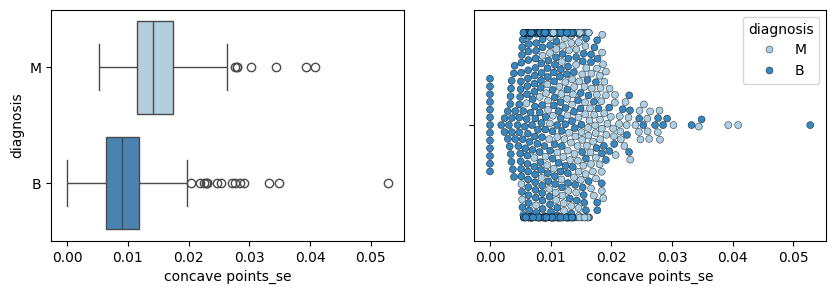

In [273]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))
sns.boxplot(data = data, x = "concave points_se", y = 'diagnosis', ax = ax1, palette = PALETTE)
sns.swarmplot(data = data, x = "concave points_se", hue = 'diagnosis', ax = ax2,
              palette = PALETTE, edgecolor = "k", linewidth = 0.3);

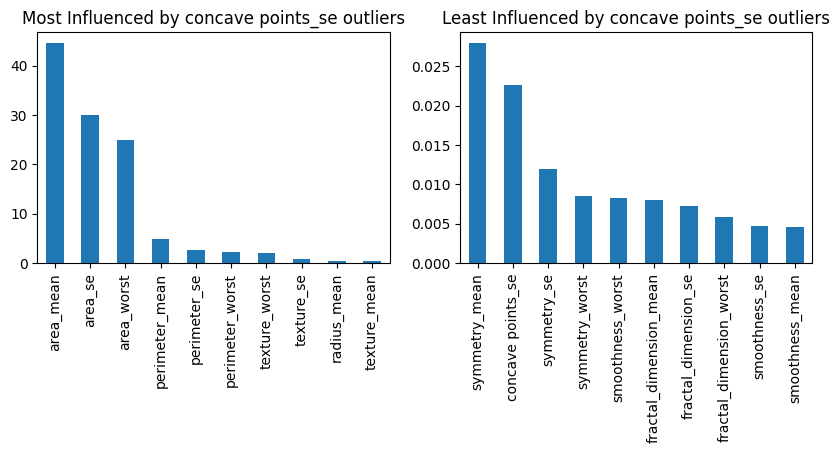

In [274]:
# Getting outliers
quantile = data["concave points_se"].quantile(0.98)
temp = data.copy()
temp['diagnosis'] = temp['diagnosis'].map({"B":0, "M":1})


OUT_DF = pd.DataFrame(index = data.columns)
OUT_DF["NO_OUTLIERS"] =  temp[temp["concave points_se"] < quantile].mean().values
OUT_DF["OUTLIERS"] = temp[temp["concave points_se"] > quantile].mean().values
OUT_DF["Difference"] = np.absolute(OUT_DF["NO_OUTLIERS"] - OUT_DF["OUTLIERS"])

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

OUT_DF.sort_values(by = "Difference", ascending = False).head(10)["Difference"].plot(kind = "bar",
                                                                                     ax = ax1)
ax1.set_title("Most Influenced by concave points_se outliers")
OUT_DF.sort_values(by = "Difference", ascending = False).tail(10)["Difference"].plot(kind = "bar",
                                                                                     ax = ax2)
ax2.set_title("Least Influenced by concave points_se outliers");

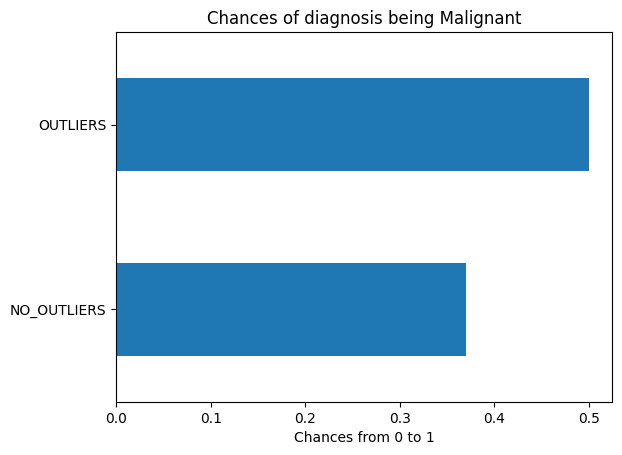

In [275]:
OUT_DF.T["diagnosis"][:2].plot(kind = "barh")
plt.title("Chances of diagnosis being Malignant")
plt.xlabel("Chances from 0 to 1");

In our comparison, becomes evident that the presence of outliers is associated with an increased likelihood of a malignant diagnosis. However, it's crucial to contextualize this observation. Rather than being detrimental, these outliers play a valuable role in strengthening our ability to distinguish between malignant and benign diagnoses.

To appreciate this context fully, it's essential to recognize that these outliers are not anomalies that disrupt our analysis as we were thinking. Instead, they serve as informative data points that contribute to the robustness of our diagnostic test. They represent cases where cellular characteristics deviate from the norm, often in ways that align with the hallmarks of malignancy.

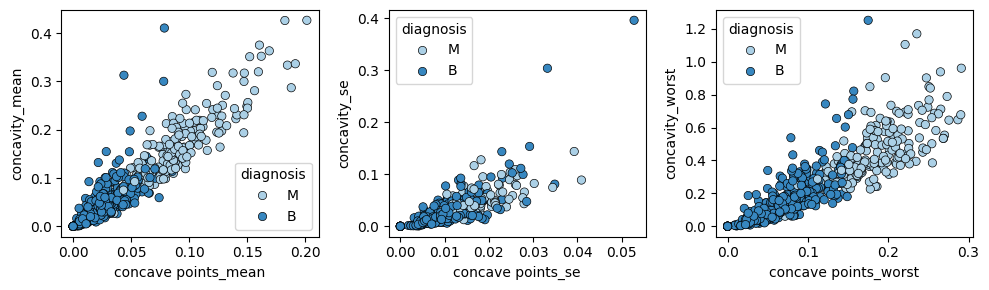

In [276]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.scatterplot(data = data, x = "concave points_mean", y = "concavity_mean",
                hue = "diagnosis", ax = ax1, palette = PALETTE, edgecolor = 'k')

sns.scatterplot(data = data, x = "concave points_se", y = "concavity_se",
                hue = "diagnosis", ax = ax2, palette = PALETTE, edgecolor = 'k')

sns.scatterplot(data = data, x = "concave points_worst", y = "concavity_worst",
                hue = "diagnosis", ax = ax3, palette = PALETTE, edgecolor = 'k')

plt.tight_layout();

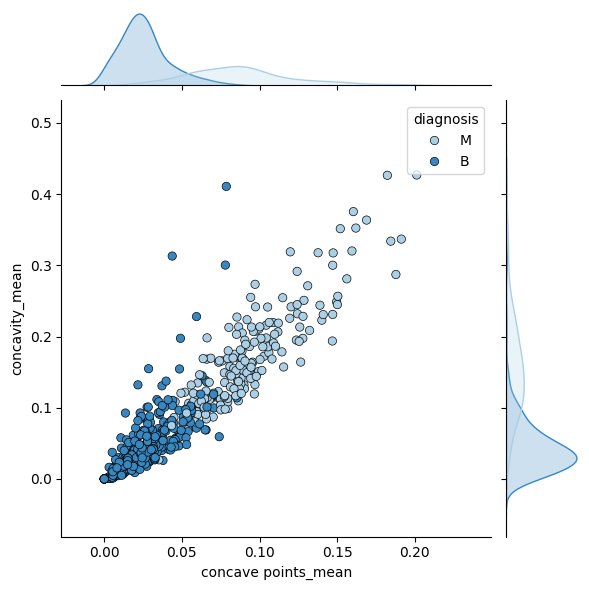

In [277]:
sns.jointplot(data = data, x = "concave points_mean", y = "concavity_mean",
              hue = "diagnosis", palette = PALETTE, edgecolor = 'k');

Apart from the observations related to outliers, it's challenging to draw further definitive insights at this stage of the analysis. However, it's worth emphasizing that, up to this point, we can assert with confidence that elevated values in most of the features tend to correlate with a higher likelihood of a malignant diagnosis. This pattern underscores the potential significance of these features in the diagnostic process.

To gain a deeper understanding of this behavior, it would be prudent to embark on a Principal Component Analysis (PCA). PCA can reveal underlying patterns and relationships within the data, which could provide more profound insights into the factors driving malignancy. Additionally, it can help identify combinations of features that carry substantial information for distinguishing between benign and malignant cases.

Simultaneously, it's advisable to proceed with an exploration of the remaining correlated variables and conduct supplementary analyses. This multifaceted approach ensures that we leave no stone unturned in our quest to uncover valuable insights that can further enhance our diagnostic capabilities.

## Overall analysis

In the overarching analysis, there are several techniques at our disposal. Given that all the features are numeric, one approach I intend to explore is the aggregation of all the "mean", "se" and "worst" features into a unified dimension. By summing these feature sets, we can obtain a comprehensive perspective on how they collectively interact when visualized according to diagnosis.

Following this, another avenue I plan to pursue is Principal Component Analysis (PCA). PCA is a powerful method for uncovering underlying patterns and reducing dimensionality while preserving essential information. It promises to provide deeper insights into the interplay between these features, potentially revealing latent structures that aid in the differentiation of benign and malignant cases.

In essence, this dual-pronged approach seeks to leverage the inherent characteristics of the data. First, we consolidate and visualize the "mean" and "worst" feature sets to gain an initial understanding of their collective behavior. Subsequently, we delve into PCA, a sophisticated technique that can unveil intricate relationships within the data. Together, these methods empower us to navigate the complexities of the dataset and refine our diagnostic capabilities for breast cancer assessment.

In [278]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

temp = data.copy()

temp[temp.drop("diagnosis", axis = 1).columns] = MinMaxScaler().fit_transform(temp[temp.drop("diagnosis", axis = 1).columns])

# Creating summed variables

mean_features = [feature for feature in temp.drop("diagnosis", axis = 1).columns if "mean" in feature]

worst_features = [feature for feature in temp.drop("diagnosis", axis = 1).columns if "worst" in feature]

se_features = [feature for feature in temp.drop("diagnosis", axis = 1).columns if "se" in feature]

temp["MEAN"] = temp[mean_features].sum(axis = 1)
temp["WORST"] = temp[worst_features].sum(axis = 1)
temp["SE"] = temp[se_features].sum(axis = 1)

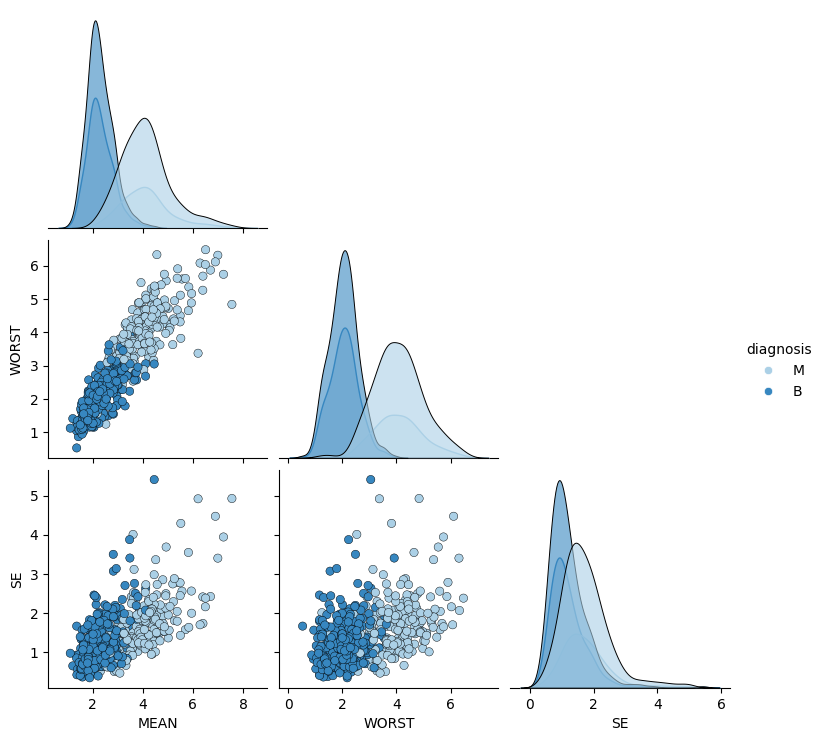

In [279]:
grid = sns.pairplot(data = temp, vars = ["MEAN", "WORST", "SE"],
                    hue = "diagnosis", palette = PALETTE, corner = True)

grid.map_lower(sns.scatterplot, edgecolor = 'k', linewidth = 0.3)
grid.map_diag(sns.kdeplot, fill = True, common_norm = False,
              alpha = .6, linewidth = 0.7, edgecolor = "k");

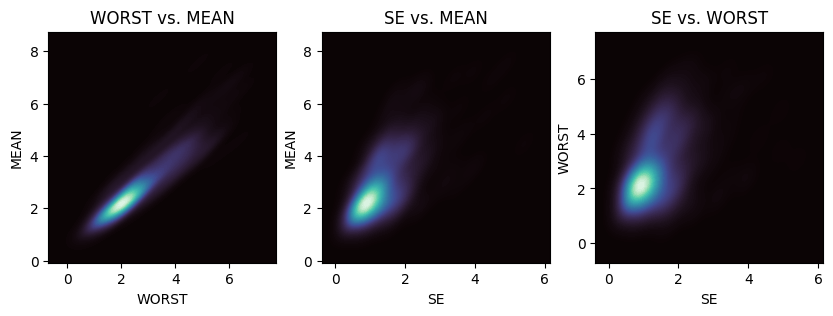

In [280]:
fig, (ax1, ax2 , ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.kdeplot(data = temp, x = "WORST", y = "MEAN",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax1)
ax1.set_title("WORST vs. MEAN")

sns.kdeplot(data = temp, x = "SE", y = "MEAN",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax2)
ax2.set_title("SE vs. MEAN")

sns.kdeplot(data = temp, x = "SE", y = "WORST",
    fill = True, thresh = 0, levels = 100, cmap = "mako", ax = ax3)
ax3.set_title("SE vs. WORST");

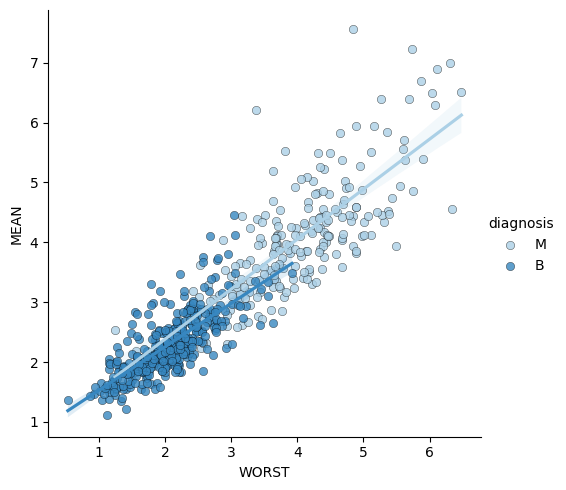

In [281]:
sns.lmplot(data = temp, x = "WORST", y = "MEAN",
           hue = "diagnosis", palette = PALETTE,
           scatter_kws = {'linewidths':0.3, 'edgecolor':'k'})

We can readily observe an almost flawless linear relationship between the "mean" and "worst" variables, where this pattern remains consistent. Higher values are consistently associated with a greater likelihood of a malign diagnosis, while lower values tend to correspond to benign cases. Additionally, the relationship between the "SE" (Standard Error) and both "MEAN" and "WORST" categories is striking; these relationships exhibit remarkable separation between the classes. This signifies a robust dataset with highly discriminative features, setting the stage for effective machine learning and diagnostic prediction.

Before delving into the modeling phase of our project, a pivotal step is to conduct Principal Component Analysis (PCA) without considering the feature labels. This approach entails disregarding whether a measurement pertains to the "mean," "standard error," or "worst" category. Instead, it focuses on reducing the data into two principal components. These components can then be analyzed in conjunction with the diagnosis variable to provide further confirmation of our hypothesis: that higher feature values correlate with an increased likelihood of malignancy, while lower values are indicative of benign cases.

In essence, this PCA analysis, decoupled from feature labels, enables us to explore the overarching data structure, seeking validation of our hypothesis in a holistic manner. By condensing the data into two primary components, we aim to discern underlying patterns that reinforce our understanding of the diagnostic relationships present within the dataset. This step serves as a crucial bridge between data exploration and the subsequent machine learning endeavors, reinforcing the foundations upon which our predictive models will be constructed.

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis, including scenarios related to cancer research. PCA is employed to simplify complex datasets while preserving essential information, making it easier to visualize and analyze patterns within the data. Here's how PCA works and how it can be applied in the context of breast cancer analysis:

**How PCA Works:**

1. **Data Transformation:** PCA starts by transforming the original data, typically a matrix with rows representing samples and columns representing features (e.g., measurements). PCA calculates the covariance matrix of the original data to understand how features relate to each other.

2. **Eigendecomposition:** PCA then performs an eigendecomposition (or singular value decomposition) of the covariance matrix. This yields eigenvectors and eigenvalues, which represent the directions of maximum variance in the data and the amount of variance along those directions, respectively.

3. **Selection of Principal Components:** PCA sorts the eigenvalues in descending order. The eigenvector associated with the highest eigenvalue becomes the first principal component, the one with the second-highest eigenvalue becomes the second principal component, and so on. Typically, only a subset of the principal components is retained (those that capture most of the variance), reducing the dimensionality of the data.

4. **Data Projection:** The original data is projected onto the new lower-dimensional space defined by the retained principal components. This transformation yields a set of uncorrelated variables (the principal components) that capture the most important information in the data.

In [282]:
from sklearn.decomposition import PCA

transformer = PCA(n_components = 2, random_state = RANDOM_STATE)

temp = data.copy()

transformed_X = transformer.fit_transform(temp[temp.drop("diagnosis", axis = 1).columns])

In [283]:
PCA_DF = pd.DataFrame(transformed_X, columns = ["PC1", "PC2"])
PCA_DF["diagnosis"] = temp.diagnosis

PCA_DF.head()

,PC1,PC2,diagnosis
0,1160.142574,-293.917544,M
1,1269.122443,15.630182,M
2,995.793889,39.156743,M
3,-407.180803,-67.380320,M
4,930.341180,189.340742,M


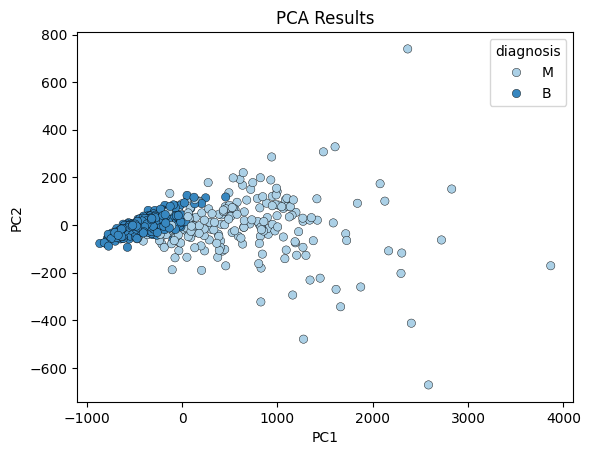

In [284]:
sns.scatterplot(data = PCA_DF, x = "PC1", y = "PC2",
              hue = "diagnosis", palette = PALETTE,
              edgecolor = "k", lw = 0.3)
plt.title("PCA Results");

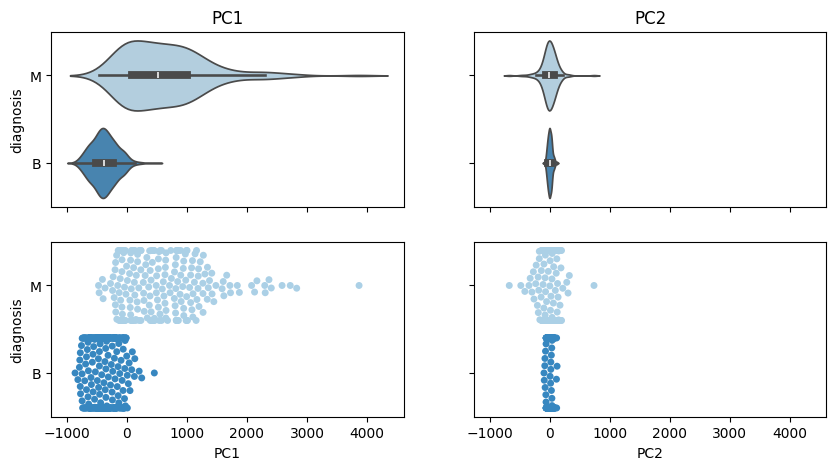

In [285]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 5),
                                             sharex = True, sharey = True)

sns.violinplot(data = PCA_DF, x = "PC1", y = "diagnosis", ax = ax1, palette = PALETTE)
sns.violinplot(data = PCA_DF, x = "PC2", y = "diagnosis", ax = ax2, palette = PALETTE)
sns.swarmplot(data = PCA_DF, x = "PC1", y = "diagnosis", ax = ax3, palette = PALETTE)
sns.swarmplot(data = PCA_DF, x = "PC2", y = "diagnosis", ax = ax4, palette = PALETTE)
ax1.set_xlabel("")
ax1.set_title("PC1")
ax2.set_title("PC2")
ax2.set_xlabel("")
ax2.set_ylabel("");

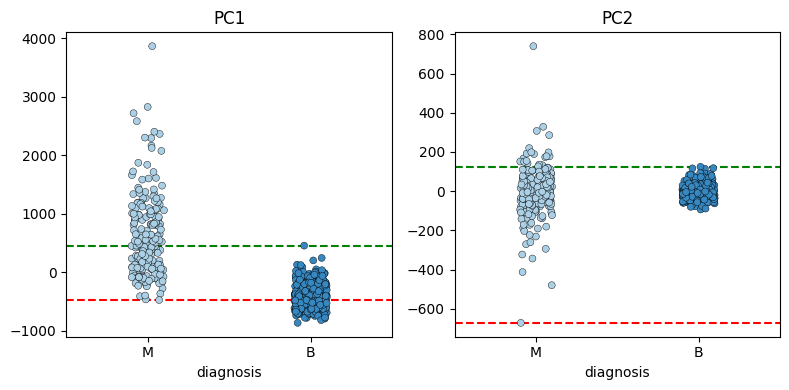

In [286]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (8, 4))

sns.stripplot(data = PCA_DF, y = "PC1", x = "diagnosis", ax = ax1, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax1.set_ylabel("")
ax1.set_title("PC1")
ax1.axhline(PCA_DF[PCA_DF['diagnosis'] == 'B']['PC1'].max(), color = 'g', ls = '--')
ax1.axhline(PCA_DF[PCA_DF['diagnosis'] == 'M']['PC1'].min(), color = 'r', ls = '--')
sns.stripplot(data = PCA_DF, y = "PC2", x = "diagnosis", ax = ax2, palette = PALETTE,
             linewidth = 0.3, edgecolor = 'k')
ax2.set_ylabel("")
ax2.set_title("PC2")
ax2.axhline(PCA_DF[PCA_DF['diagnosis'] == 'B']['PC2'].max(), color = 'g', ls = '--')
ax2.axhline(PCA_DF[PCA_DF['diagnosis'] == 'M']['PC2'].min(), color = 'r', ls = '--')
plt.tight_layout();

PCA has reaffirmed the consistent pattern we've observed since the inception of our analysis. Even when reducing the multitude of features to just two principal components, the same trend holds: higher values are strongly associated with a higher likelihood of a malign diagnosis, whereas lower values tend to correspond to benign cases. However, this PCA analysis has shed light on an important aspect; it has demonstrated that when we condense the features, the distinction between these high and low ranges of values becomes less pronounced. This implies that employing PCA in conjunction with machine learning might not be the most optimal approach, as it could potentially blur the diagnostic boundaries.

Furthermore, this analysis has raised concerns regarding feature discretization. Given the strong relationships between variables, discretizing features could lead to the loss of crucial information embedded within each feature. In light of the robust interconnections between variables, this technique may not be the most suitable option for our specific dataset.

Nonetheless, I maintain the belief that not all variables exert an equal impact on the target variable. In the pursuit of reducing the feature set to retain only the most valuable attributes for diagnosis, I am inclined to explore the Metric Based technique. This method, which we will delve into in the upcoming section on feature engineering and modeling, holds promise in helping us identify and retain the most influential variables while discarding those that contribute less significantly to the diagnostic process.

# Modeling the data

Modeling data is the process of preparing and structuring the dataset for use in machine learning. It involves cleaning, transforming, and organizing the data to ensure that it is suitable for training and evaluating machine learning models. This step is crucial before training a machine learning model because the quality and structure of the data directly impact the model's performance and the validity of its predictions. Modeling data helps ensure that the data is in the right format, contains relevant information, and is free from errors or inconsistencies, thus improving the model's ability to learn patterns and make accurate predictions.

## Feature Encoding

Feature encoding is a data preprocessing step in machine learning that focuses on converting categorical or non-numeric features into a numerical format that can be used by machine learning algorithms. The primary purpose of feature encoding is to enable algorithms to work with non-numeric data, as many machine learning models require numerical input.

In feature encoding, each unique category or label within a categorical feature is mapped to a corresponding numerical value. This conversion allows the algorithm to interpret and use these features effectively for tasks such as classification or regression. Feature encoding is essential when dealing with data that includes textual or categorical information, such as gender, color, or product type, as machine learning algorithms typically operate on numerical data.

Overall, feature encoding bridges the gap between non-numeric data and machine learning models, making it possible to leverage categorical information in the training and prediction processes.

In [287]:
# X, y

TargetMap = {"B" : 0, "M" : 1}

y = data["diagnosis"].map(TargetMap)

X = data.drop("diagnosis", axis = 1)

## Feature Scaling

Feature scaling, specifically Min-Max scaling, is a data preprocessing technique used in machine learning to transform the values of independent variables (features) to a specific range, typically between 0 and 1. Min-Max scaling rescales the feature values so that they are proportionally distributed within this predefined range. 

The process involves the following steps for each feature:
1. Find the minimum value (min) of the feature in the dataset.
2. Find the maximum value (max) of the feature in the dataset.
3. For each data point in the feature, subtract the minimum value (min) and then divide by the range (max - min). This scales the feature values linearly to fit within the range [0, 1].

Min-Max scaling is particularly useful when you want to ensure that all features have values within a consistent range, which can be important for certain machine learning algorithms. It is especially beneficial when the features have different units or scales, as it standardizes them to a common scale.

The key advantage of Min-Max scaling is that it preserves the relationships and distribution of the original data while rescaling it. However, it can be sensitive to outliers, as extreme values can disproportionately affect the scaling. In such cases, it may be necessary to apply outlier treatment techniques before Min-Max scaling.

In [288]:
scaler = MinMaxScaler()

Scaled_X = pd.DataFrame(scaler.fit_transform(X.values),
                        columns = X.columns, index = X.index)

## Feature Selection

Feature selection, in the context of machine learning and data analysis, is a process aimed at choosing a subset of the most relevant and informative features (or variables) from a larger set of available features. The objective is to improve model performance, reduce complexity, and enhance interpretability by focusing on the most significant predictors.

Metric-based feature selection is one approach within this broader concept. It involves the use of specific metrics or statistical tests to quantify the importance or relevance of each feature in relation to the target variable. These metrics serve as criteria for selecting or ranking features, and they help data scientists make informed decisions about which features to include in the final model.

Commonly used metrics for feature selection include:

1. **Correlation:** Features are evaluated based on their correlation with the target variable. Higher absolute correlation values indicate greater relevance.

2. **Mutual Information:** This metric measures the mutual dependence between a feature and the target. Higher mutual information suggests greater relevance.

3. **Chi-Squared (χ²) Test:** Typically used for categorical features, this statistical test assesses the independence between a feature and the target. Smaller p-values indicate higher relevance.

4. **F-Test (ANOVA):** This test is employed for numerical features and evaluates whether there are statistically significant differences in the means of the target variable across different feature categories.

5. **Recursive Feature Elimination (RFE):** RFE is an iterative method that ranks features by recursively training a model and eliminating the least important feature at each step. This continues until a desired number of features is reached.

6. **L1 Regularization (LASSO):** L1 regularization methods, like LASSO (Least Absolute Shrinkage and Selection Operator), encourage sparsity by penalizing the absolute values of feature coefficients. Features with non-zero coefficients are selected.

7. **Information Gain and Entropy:** These metrics, commonly used in decision trees and random forests, assess how well a feature splits or classifies data into different target categories.

8. **Permutation Importance:** This method evaluates the change in model performance (e.g., accuracy or F1 score) when the values of a feature are randomly shuffled. A significant drop in performance indicates the feature's importance.

The choice of metric depends on the nature of the data and the problem at hand. Feature selection based on these metrics helps streamline the modeling process, reduce overfitting, enhance model interpretability, and often leads to improved model generalization. It's important to note that feature selection should be performed carefully, as removing important features can result in loss of critical information.

In addition to Metric-Based selection, there exist various other feature selection techniques that can be explored for different scenarios and datasets. I'd like to extend an invitation to delve into my project titled "Feature Selection for Machine Learning." In this comprehensive project, I've taken a deep dive into a spectrum of feature selection methods, meticulously analyzing their strengths, weaknesses, and practical applications.


- [Liam Arguedas: Feature Selection for Machine Learning](https://www.kaggle.com/code/liamarguedas/feature-selection-for-machine-learning)

In [289]:
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.ensemble import RandomForestClassifier

selector = SelectBySingleFeaturePerformance(estimator = RandomForestClassifier(random_state = RANDOM_STATE, n_jobs = -1),
                                            scoring = 'roc_auc', cv = 3, threshold = 0.80, variables = None)

Selected_X = selector.fit_transform(Scaled_X, y)

In [290]:
# Original Size, After Drop Size

Scaled_X.shape[1], Selected_X.shape[1]

(30, 14)

In [291]:
FeaturePerformance = pd.DataFrame(index = selector.feature_performance_.keys(),
                                  columns = ["AUC SCORE"],
                                  data = selector.feature_performance_.values())
FeaturePerformance.style.apply(
    lambda value: ['background: lightgreen' if value.name in Selected_X.columns else '' for item in value], axis = 1)

,AUC SCORE
radius_mean,0.892043
texture_mean,0.653978
perimeter_mean,0.902138
area_mean,0.893469
smoothness_mean,0.615605
compactness_mean,0.808405
concavity_mean,0.899403
concave points_mean,0.923530
symmetry_mean,0.614651
fractal_dimension_mean,0.548099


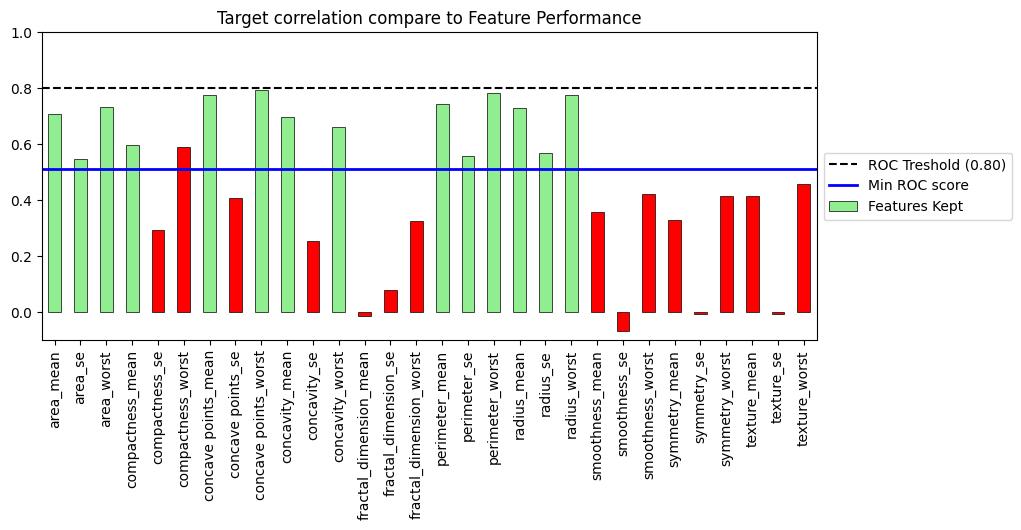

In [292]:
temp = data.copy()
temp['diagnosis'] = temp['diagnosis'].map({"B":0, "M":1})

temp.corr()['diagnosis'].sort_values(ascending = False)[1:].sort_index().plot(kind = 'bar',
                                                                 edgecolor = 'k', lw = 0.5,
                                                                figsize = (10, 4),
                                                                color = {key:"lightgreen" if key in Selected_X.columns else "red" for key in sorted(temp.drop("diagnosis", axis = 1).columns)}.values(),
                                                                             label = "Features Kept")
plt.axhline(0.8, c = 'k', ls = "--", label = "ROC Treshold (0.80)")
plt.axhline(FeaturePerformance["AUC SCORE"].min(), label = "Min ROC score", c = "b", lw = 2)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))
plt.grid(False)
plt.title("Target correlation compare to Feature Performance")
plt.ylim(-.1, 1);

In [293]:
# Score of compactness_worst, difference between Treshold and score of compactness_worst

FeaturePerformance.loc["compactness_worst"].values, 0.80 - FeaturePerformance.loc["compactness_worst"].values

(array([0.76963997]), array([0.03036003]))

In [294]:
Selected_X["compactness_worst"] = Scaled_X["compactness_worst"]

In [295]:
X = Scaled_X[Selected_X.columns]

The features chosen for training our model align closely with those that exhibit the highest correlation with the target variable. This selection process underscores the importance of leveraging features that are strongly linked to the outcome we aim to predict. Additionally, I made a deliberate decision to include "compactness_worst" in our feature set, even though it was initially excluded by the feature selection algorithm.

My rationale for this manual inclusion is based on the fact that "compactness_worst" displays a remarkably high correlation with the target variable. While it didn't meet the predefined threshold set by the feature selection algorithm for automatic inclusion, its notable correlation suggests that it holds valuable information for our predictive task. By incorporating "compactness_worst" into our feature set, we are taking a proactive approach to harnessing its potential benefits, even if it wasn't initially prioritized by the automated selection process.

# Machine Learning Workflow

In this section, our primary objective is to employ a range of supervised classification algorithms, assess their performance, and ultimately identify the most suitable one for achieving our specific goals. This process involves not only training the models but also delving into various techniques to thoroughly analyze their capabilities and limitations.

To begin, we'll divide our dataset into appropriate subsets for training and testing, ensuring that we rigorously assess each model's generalization to unseen data. Cross-validation, a crucial technique, will be employed to robustly evaluate how well each algorithm performs across different data partitions. This approach provides a more comprehensive understanding of each model's consistency and effectiveness.

Our overarching aim is to craft an initial solution to the problem at hand, which involves predicting outcomes based on the given data. This entails running our dataset through multiple classification algorithms, observing their respective predictive performances, and discerning which one aligns most closely with our objectives.

Throughout this process, we'll scrutinize key performance metrics, such as accuracy, precision, recall, and F1-score, to gauge how well each model aligns with our specific goals. Additionally, we will explore techniques for fine-tuning hyperparameters, optimizing model parameters, and addressing potential overfitting or underfitting issues.

## Model evaluation

In supervised classification problems, where the goal is to categorize data points into predefined classes or labels, there are several evaluation metrics used to assess the performance of machine learning models. These metrics help us understand how well a model is doing in terms of making correct predictions and can vary based on the nature of the problem (binary or multiclass). Here are some common evaluation metrics for classification problems:

1. **Accuracy:** Accuracy is one of the most straightforward metrics and represents the ratio of correctly predicted instances to the total number of instances. It's suitable for balanced datasets but can be misleading when dealing with imbalanced datasets.

2. **Precision:** Precision measures the proportion of true positive predictions among all positive predictions made by the model. It helps assess the model's ability to make accurate positive predictions and is valuable when false positives are costly.

3. **Recall (Sensitivity or True Positive Rate):** Recall quantifies the proportion of true positive predictions among all actual positive instances in the dataset. It helps evaluate a model's ability to identify all relevant instances of a class and is crucial when missing a positive prediction is costly.

4. **F1-Score:** The F1-Score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives, making it suitable for imbalanced datasets. It's especially useful when you want to strike a balance between precision and recall.

6. **ROC Curve (Receiver Operating Characteristic Curve):** The ROC curve is a graphical representation of a model's performance across different thresholds. It plots the true positive rate (recall) against the false positive rate (1-specificity). The area under the ROC curve (AUC-ROC) quantifies the model's overall performance.


While we certainly intend to evaluate a comprehensive set of metrics to assess the performance of our models, my primary focus will be on three key evaluation aspects: the ROC Curve, precision, and recall metrics, in that particular order.

In our approach, we recognize that the choice of evaluation metrics should align with the nuances of our specific problem. For instance, when the positive class dominates in terms of sample size, focusing on ROC metrics can be beneficial, as precision and recall may predominantly reflect the ability to predict the positive class. This can occur because the larger positive class naturally presents more opportunities for the model to make correct predictions. 

Conversely, if the negative class (typically the minority in such cases) holds greater importance, we can strategically swap the labels and place emphasis on precision and recall. This adjustment acknowledges the significance of correctly identifying the negative class instances, which might be relatively more challenging due to their smaller numbers. As our journey unfolds, we remain flexible in our choice of evaluation metrics, aligning them with the specific demands and priorities of our classification task. This adaptability ensures that our assessment accurately reflects the performance factors most relevant to our problem.

In [296]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Baseline Scores

Baseline scores serve as crucial reference points in our analysis, providing insights into the effectiveness of the approach we've adopted for our predictive task. These scores play a pivotal role in distinguishing between meaningful model performance and outcomes that could occur by random chance.

By computing and evaluating these baseline scores, we gain a valuable perspective. If our machine learning model performs no better than these random predictions, it suggests that our approach lacks any meaningful predictive power. Conversely, if our model surpasses these baseline scores, it provides evidence that our chosen approach is indeed capturing patterns and relationships within the data.

### Zero Rate Score

The Zero Rate Score baseline score represents a simple yet essential reference point in binary classification tasks. It signifies the accuracy achieved when the model consistently predicts the majority class for all instances, effectively making the same prediction regardless of the input data. This baseline score provides a fundamental benchmark, indicating how well our model performs compared to a strategy of predicting the majority class without considering any underlying patterns or relationships in the data.

In [297]:
ZeroR = accuracy_score(y, np.zeros_like(y))
ZeroR

0.6274165202108963

### Random Rate Classifier 
The Random Rate Classifier, often referred to as Weighted Guessing, is a baseline strategy employed in binary classification tasks. This approach assigns class labels to instances randomly based on the class distribution in the training data, with the probability of selecting each class corresponding to its proportion in the dataset. In essence, it mimics a scenario where predictions are made without any consideration of the data's features or patterns, relying solely on chance. The Random Rate Classifier serves as a fundamental benchmark for evaluating the performance of machine learning models, as any model should demonstrate superior predictive capabilities compared to this random guessing approach to be considered effective.

In [298]:
(y.value_counts() / len(data)).to_frame()

,diagnosis
0,0.627417
1,0.372583


In [299]:
WeightedG = (0.627417 ** 2) + (0.372583 ** 2)
WeightedG

0.532470183778

In [300]:
Baseline = pd.DataFrame(data = [ZeroR, WeightedG],
                        columns = ['Accuracy'],
                        index = ['Zero Rate', 'Random Rate Classifier'])
Baseline

,Accuracy
Zero Rate,0.627417
Random Rate Classifier,0.532470


Utilizing the zero rate score as a reference point, our model must achieve a minimum accuracy of 0.62 to be deemed valuable. However, this seemingly acceptable score on paper, it carries significant limitations in practical applications. In reality, such a score might not be as impressive because it essentially entails dismissing one entire class, rendering the model one-sided. It's important to recognize that these baseline scores serve as reference benchmarks, not targets to attain. Our objective is not to merely match these baseline scores but rather to substantially surpass them. The greater the disparity between our model's performance and these baseline scores, the more effectively it addresses the nuances of our specific problem. Ultimately, our aim is to achieve a model that excels in making meaningful predictions while recognizing and accurately handling all classes, thereby surpassing the limitations posed by baseline scores.

## Model Selection

In this scenario, we're tackling a classification problem, which falls within the realm of supervised learning. Our ultimate objective revolves around harnessing the predictive power of various features (predictors) to accurately classify data points into their respective classes or categories. This problem entails the guidance of algorithms to discern patterns and relationships within the data that will enable us to make precise class predictions.

As we delve into this supervised learning task, our approach entails experimenting with a diverse set of machine learning algorithms. These algorithms serve as our tools of choice, each wielding its unique set of strengths and adaptability to distinct data patterns. By employing a variety of algorithms, we aim to explore their individual capacities in handling the intricacies of our classification problem. We will execute the following algorithms:

1. **Logistic Regression:** Logistic Regression is a linear classification model used for binary and multiclass classification. It models the probability of a data point belonging to a specific class and is particularly useful for its simplicity and interpretability.

2. **Decision Tree:** Decision Trees are hierarchical structures that make decisions based on a series of conditions. They're versatile and can be used for classification and regression tasks, but they are prone to overfitting.

3. **Random Forest:** Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting. It's highly robust and suitable for a wide range of applications.

4. **Support Vector Machine (SVM):** SVM is a powerful classification algorithm that finds a hyperplane to separate data into different classes. It's effective in high-dimensional spaces and can handle both linear and nonlinear classification problems.

5. **K-Nearest Neighbors (KNN):** KNN is a simple and intuitive algorithm that classifies data points based on the majority class of their k-nearest neighbors in feature space. It's effective for both classification and regression tasks.

6. **Naive Bayes:** Naive Bayes is a probabilistic classifier based on Bayes' theorem with the "naive" assumption of feature independence. It's efficient, particularly for text classification and spam detection.

7. **Gradient Boosting Machines (GBM):** GBM is an ensemble technique that builds an additive model by training weak learners sequentially. It's highly effective and widely used for classification and regression tasks.

8. **XGBoost:** XGBoost is an optimized implementation of gradient boosting that has gained popularity for its speed and performance. It's known for winning many Kaggle competitions.

9. **LightGBM:** LightGBM is another gradient boosting framework that's designed for efficiency and speed. It's particularly useful for large datasets and high-dimensional features.

10. **CatBoost:** CatBoost is a gradient boosting algorithm specifically designed for categorical feature support. It automates categorical feature encoding and is known for its strong out-of-the-box performance.

11. **AdaBoost:** AdaBoost is an ensemble method that combines multiple weak learners to create a strong learner. It adapts by giving more weight to misclassified instances in subsequent iterations.

12. **LDA (Linear Discriminant Analysis):** LDA is a dimensionality reduction technique and a classification algorithm that aims to maximize the separability between classes by finding linear combinations of features.

13. **QDA (Quadratic Discriminant Analysis):** QDA is similar to LDA but allows for different covariance matrices for each class, making it more flexible in handling non-linear relationships.

14. **Extra Trees Classifier:** Extra Trees is an ensemble learning method similar to Random Forest but with more randomization in the tree-building process.

15. **Gaussian Process Classifier:** Gaussian Process is a probabilistic model that can be used for classification. It models the distribution over functions and provides uncertainty estimates.

16. **MLP (Multi-layer Perceptron):** MLP is a type of artificial neural network that consists of multiple layers of interconnected neurons. It's used for a wide range of tasks, including classification.

Each of these models has its strengths and weaknesses, making them suitable for different types of problems and datasets. The choice of the most appropriate model depends on the specific characteristics of the data and the goals of the machine learning task.

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

In [302]:
Models = [LogisticRegression(random_state = RANDOM_STATE),
          DecisionTreeClassifier(random_state = RANDOM_STATE), 
          RandomForestClassifier(random_state = RANDOM_STATE),
          SVC(probability = True, random_state = RANDOM_STATE, kernel = "linear"), 
          SVC(probability = True, random_state = RANDOM_STATE, kernel = "rbf"),
          GaussianNB(),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state = RANDOM_STATE),
          LGBMClassifier(random_state = RANDOM_STATE, verbose = -1),
          XGBClassifier(random_state = RANDOM_STATE),
          CatBoostClassifier(random_state = RANDOM_STATE, verbose = False),
          AdaBoostClassifier(random_state = RANDOM_STATE),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),
          ExtraTreesClassifier(random_state = RANDOM_STATE),
          GaussianProcessClassifier(random_state = RANDOM_STATE),
          MLPClassifier(random_state = RANDOM_STATE)]

ModelsName = ['Logistic Regression', 'Decision Trees','Random Forest',
              'SVM (Linear)', 'SVM (RBF)','Naive Bayes','K-Nearest Neighbors',
              'Gradient Boosting', 'LightGBM', 'XGBoost', 'CatBoost', 'AdaBoost',
              'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis'
              , 'ExtraTrees', 'GaussianProcess', 'MLPC']

## Cross-validation

Cross-validation is a fundamental technique in machine learning used to assess the performance and generalization ability of a model. It involves dividing a dataset into multiple subsets, or "folds," and iteratively training and testing the model on different combinations of these folds. The primary goal is to obtain a robust estimate of a model's performance that is less dependent on the specific random partitioning of the data.

StratifiedKFold is a specific type of cross-validation technique that ensures that each fold maintains the same class distribution as the original dataset. This is particularly important in classification problems, especially when dealing with imbalanced datasets where one class significantly outnumbers the others. StratifiedKFold helps prevent issues where one or more folds contain an insufficient number of instances from a minority class, which could lead to biased or unreliable performance estimates.

Here's how StratifiedKFold works:

1. The dataset is divided into K equal-sized folds, where K is a user-defined parameter.

2. For each iteration or "fold," K-1 of these folds are used for training the model, and the remaining fold is used for testing the model's performance.

3. This process is repeated K times, with each fold taking turns as the test set while the others serve as the training set.

4. The performance metrics (e.g., accuracy, precision, recall) are recorded for each fold, resulting in K performance scores.

5. These K performance scores are typically averaged to obtain a single, more robust estimate of the model's performance.

StratifiedKFold is especially beneficial when working with classification tasks, as it helps ensure that the model's performance assessment accurately reflects its ability to handle class imbalances. By maintaining a consistent class distribution in each fold, it helps produce more reliable and less biased performance metrics, making it a valuable tool in the model evaluation process.

In [303]:
from sklearn.model_selection import StratifiedKFold

SGK = StratifiedKFold(n_splits = 10, shuffle = True, random_state = RANDOM_STATE)

In [304]:
# Metrics arrays

accuracy, precision, recall, f1score, auc_roc = list(), list(), list(), list(), list()

# Information arrays
namelist, kfold = list(), list()

In [305]:
def get_metrics(classifier, name, X_train, X_validation, y_train, y_validation):
    
     # Loading the model
    model = classifier
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Predicting validation fold
    prediction = classifier.predict(X_validation)
    proba_prediction = classifier.predict_proba(X_validation)
    
    # Recording results
    namelist.append(ModelsName[name])
    auc_roc.append(roc_auc_score(y_validation, proba_prediction[:,1]))
    accuracy.append(accuracy_score(y_validation, prediction))
    precision.append(precision_score(y_validation, prediction, average = 'binary'))
    recall.append(recall_score(y_validation, prediction, average = 'binary'))
    f1score.append(f1_score(y_validation, prediction, average = 'binary'))

In [306]:
%%time

for fold, (train_index, validation_index) in enumerate(SGK.split(X, y)):
    
    # Creating each fold dataset

    X_train, y_train = X.loc[train_index], y.loc[train_index]
  
    X_validation, y_validation = X.loc[validation_index], y.loc[validation_index]
    
    print(f"Fold {fold + 1} -", end = " ")
        
    for name, model in enumerate(Models):
        
        get_metrics(model, name, X_train, X_validation, y_train, y_validation)
        
        kfold.append(fold + 1)
       
    print("Completed")

print()

Fold 1 - Completed
Fold 2 - Completed
Fold 3 - Completed
Fold 4 - Completed
Fold 5 - Completed
Fold 6 - Completed
Fold 7 - Completed
Fold 8 - Completed
Fold 9 - Completed
Fold 10 - Completed

CPU times: total: 1min 20s
Wall time: 52 s


In [307]:
CVSummary = pd.DataFrame({
    "Model": namelist,
    "AUC ROC": auc_roc,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1score,
    "Fold": kfold
})

In [308]:
ModelPerformance = CVSummary.drop("Fold", axis = 1).groupby("Model").mean().sort_values(by = ["AUC ROC", "Precision", "Recall"],
                                                                    ascending = False)

ModelPerformance.style.highlight_max(subset = None, color = 'lightgreen', axis = 0, props = None)

,AUC ROC,Accuracy,Precision,Recall,F1-Score
Model,,,,,
MLPC,0.992227,0.950783,0.944405,0.924675,0.933349
LinearDiscriminantAnalysis,0.991133,0.943797,0.984899,0.862771,0.918456
CatBoost,0.991021,0.947243,0.942948,0.914935,0.927746
XGBoost,0.990737,0.940163,0.931878,0.910390,0.919214
SVM (RBF),0.990253,0.943766,0.961144,0.886580,0.921450
Random Forest,0.990105,0.947274,0.939084,0.919913,0.928191
LightGBM,0.990075,0.941917,0.943902,0.900649,0.920220
Gradient Boosting,0.989635,0.936717,0.929183,0.900866,0.913140
ExtraTrees,0.988523,0.945520,0.943141,0.910390,0.925283


In [309]:
# MLPC Performance

CVSummary[CVSummary["Model"] == "MLPC"].describe()[1:]

,AUC ROC,Accuracy,Precision,Recall,F1-Score,Fold
mean,0.992227,0.950783,0.944405,0.924675,0.933349,5.50000
std,0.007098,0.019938,0.040288,0.045148,0.026632,3.02765
min,0.976623,0.912281,0.869565,0.857143,0.883721,1.00000
25%,0.988095,0.933976,0.921625,0.904762,0.913525,3.25000
50%,0.993953,0.964912,0.951190,0.928571,0.950000,5.50000
75%,0.997042,0.964912,0.954004,0.952381,0.952381,7.75000
max,1.000000,0.964912,1.000000,1.000000,0.954545,10.00000


In [310]:
# LinearDiscriminantAnalysis Performance

CVSummary[CVSummary["Model"] == "LinearDiscriminantAnalysis"].describe()[1:]

,AUC ROC,Accuracy,Precision,Recall,F1-Score,Fold
mean,0.991133,0.943797,0.984899,0.862771,0.918456,5.50000
std,0.006022,0.021499,0.024432,0.061605,0.033552,3.02765
min,0.982804,0.912281,0.944444,0.809524,0.871795,1.00000
25%,0.985714,0.929825,0.965909,0.809524,0.894737,3.25000
50%,0.991486,0.938596,1.000000,0.836580,0.910783,5.50000
75%,0.996032,0.960056,1.000000,0.904762,0.944207,7.75000
max,1.000000,0.982456,1.000000,0.954545,0.975610,10.00000


Upon conducting 10-fold cross-validation, it has come to our attention that two models, namely the Multi-layer Perceptron Classifier (MLPC) and Linear Discriminant Analysis (LDA), have demonstrated the most commendable performance. This outcome aligns logically with our earlier explorations of the dataset's characteristics and the types of relationships these models exhibit with the target variable. Now, confronted with the challenge of selecting the optimal model, we find ourselves in a somewhat fortunate dilemma. With just two models emerging as the top performers, we are presented with an intriguing opportunity: the prospect of combining their strengths through an ensemble method known as a voting classifier.

A voting classifier allows us to leverage the distinctive strengths and tendencies of both MLPC and LDA. By aggregating their predictions and collectively deciding on the final classification, we can potentially enhance our model's predictive accuracy and robustness. This strategic fusion of models enables us to capitalize on their unique approaches to the problem, creating a formidable ensemble that can outperform either model individually. Consequently, we are poised to make more confident and accurate predictions, harnessing the collective intelligence of our two top-performing models for an enhanced classification solution.

## Voting Classifier

A voting classifier is an ensemble learning method in machine learning that combines the predictions of multiple individual models, often referred to as "base classifiers," to make a final prediction. The key idea behind a voting classifier is to aggregate the decisions of the base classifiers to improve the overall accuracy and generalization of the model.

There are two main types of voting classifiers: hard voting and soft voting.

1. **Hard Voting Classifier:**
   - In a hard voting classifier, each base classifier in the ensemble independently predicts the class label for a given input.
   - The final prediction is determined by a majority vote. The class that receives the most votes from the base classifiers is selected as the predicted class.
   - This approach is effective when the base classifiers have comparable performance, and the majority vote can help correct individual errors.

2. **Soft Voting Classifier:**
   - In a soft voting classifier, each base classifier provides a probability distribution over the possible class labels for a given input.
   - Instead of a majority vote, the final prediction is based on the weighted average of the predicted probabilities from the base classifiers.
   - The weights assigned to each base classifier can be uniform or customized based on their performance or confidence.
   - Soft voting is particularly useful when the base classifiers can provide probabilistic output, as it takes into account the certainty of each prediction. It often leads to more accurate and calibrated predictions.

The choice between hard and soft voting depends on the nature of the problem and the characteristics of the base classifiers. Soft voting is preferred when the base classifiers provide probability estimates, as it allows for a more nuanced and probabilistic decision-making process. It can also handle situations where the base classifiers have different levels of confidence in their predictions.

In [311]:
from sklearn.ensemble import VotingClassifier

SGK = StratifiedKFold(n_splits = 10, shuffle = True, random_state = RANDOM_STATE)

# Metrics arrays
hard_accuracy, hard_precision, hard_recall, hard_f1score = list(), list(), list(), list()
soft_accuracy, soft_precision, soft_recall, soft_f1score = list(), list(), list(), list()
soft_auc_roc = list()


# Information arrays
kfold = list()

# Models
Models = [MLPClassifier(random_state = RANDOM_STATE),
          LinearDiscriminantAnalysis()]

In [312]:
%%time

for fold, (train_index, validation_index) in enumerate(SGK.split(X, y)):
    
    # Creating each fold dataset

    X_train, y_train = X.loc[train_index], y.loc[train_index]
  
    X_validation, y_validation = X.loc[validation_index], y.loc[validation_index]
    
    print(f"Fold {fold + 1} -", end = " ")
        
    # Classifiers    
    classifier1 = Models[0]
    classifier2 = Models[1]
    
    # VotingClassifier (hard)
    hard_voting_classifier = VotingClassifier(estimators = [('MLPC', classifier1), 
                                                       ('Linear Discriminant', classifier2)], voting = 'hard')
    
    # VotingClassifier (hard)
    soft_voting_classifier = VotingClassifier(estimators = [('MLPC', classifier1), 
                                                       ('Linear Discriminant', classifier2)], voting = 'soft')
    
    # Fitting     
    hard_voting_classifier.fit(X_train, y_train)
    soft_voting_classifier.fit(X_train, y_train)
    
    # Predicting validation fold
    hard_prediction = hard_voting_classifier.predict(X_validation)
    soft_prediction = soft_voting_classifier.predict(X_validation)
    
    # Predicting proba of soft voting
    proba_prediction = soft_voting_classifier.predict_proba(X_validation)
        
    # Recording results
    hard_accuracy.append(accuracy_score(y_validation, hard_prediction))
    hard_precision.append(precision_score(y_validation, hard_prediction, average = 'binary'))
    hard_recall.append(recall_score(y_validation, hard_prediction, average = 'binary'))
    hard_f1score.append(f1_score(y_validation, hard_prediction, average = 'binary'))
    
    soft_auc_roc.append(roc_auc_score(y_validation, proba_prediction[:,1]))
    soft_accuracy.append(accuracy_score(y_validation, soft_prediction))
    soft_precision.append(precision_score(y_validation, soft_prediction, average = 'binary'))
    soft_recall.append(recall_score(y_validation, soft_prediction, average = 'binary'))
    soft_f1score.append(f1_score(y_validation, soft_prediction, average = 'binary'))
    
    kfold.append(fold + 1)
       
    print("Completed")

Fold 1 - Completed
Fold 2 - Completed
Fold 3 - Completed
Fold 4 - Completed
Fold 5 - Completed
Fold 6 - Completed
Fold 7 - Completed
Fold 8 - Completed
Fold 9 - Completed
Fold 10 - Completed
CPU times: total: 5.77 s
Wall time: 16.9 s


In [313]:
VotingSummary = pd.concat([pd.DataFrame({
    "Type": ["Soft Voting"] * 10,
    "ROC AUC": soft_auc_roc,
    "Accuracy": soft_accuracy,
    "Precision": soft_precision,
    "Recall": soft_recall,
    "F1-Score": soft_f1score,
    "Fold": kfold}), pd.DataFrame({
    "Type": ["Hard Voting"] * 10,
    "ROC AUC":[np.nan] * 10,
    "Accuracy": hard_accuracy,
    "Precision": hard_precision,
    "Recall": hard_recall,
    "F1-Score": hard_f1score,
    "Fold": kfold})], axis = 0)

In [314]:
VotingPerformance = VotingSummary.drop("Fold", axis = 1).groupby("Type").mean()
VotingPerformance.loc[len(VotingPerformance.index)] = [ 0.992227, 0.950783, 0.944405, 0.924675, 0.933349] 
VotingPerformance.loc[len(VotingPerformance.index)] = [ 0.991133, 0.943797,  0.984899, 0.862771, 0.918456] 
OverallComparation = VotingPerformance.rename({2: "MLPC", 3: "LinearDiscriminant"}, axis = 'index')

OverallComparation.style.highlight_max(subset = None, color = 'lightgreen',
                                       axis = 0, props = None).highlight_min(subset = None,
                                                                             color = 'red', axis = 0, props = None)

,ROC AUC,Accuracy,Precision,Recall,F1-Score
Type,,,,,
Hard Voting,nan,0.938534,0.984899,0.848701,0.910224
Soft Voting,0.992737,0.950815,0.981169,0.886580,0.929975
MLPC,0.992227,0.950783,0.944405,0.924675,0.933349
LinearDiscriminant,0.991133,0.943797,0.984899,0.862771,0.918456


Upon conducting an in-depth analysis and meticulous comparison of the selected methods, it becomes evident that Hard Voting doesn't align with our objectives and performance expectations. Regrettably, it falls short in terms of delivering a desirable level of predictive accuracy and model robustness. Consequently, I have opted to exclude Hard Voting from consideration as a viable ensemble technique for our specific task.

In [315]:
OverallComparation[1:].style.highlight_max(subset = None, color = 'lightgreen',
                                       axis = 0, props = None).highlight_min(subset = None,
                                                                             color = 'red', axis = 0, props = None)

,ROC AUC,Accuracy,Precision,Recall,F1-Score
Type,,,,,
Soft Voting,0.992737,0.950815,0.981169,0.886580,0.929975
MLPC,0.992227,0.950783,0.944405,0.924675,0.933349
LinearDiscriminant,0.991133,0.943797,0.984899,0.862771,0.918456


Following a second round of analysis and model evaluation, it has become evident that Linear Discriminant Analysis (LDA) no longer aligns with our model selection criteria. Despite its initial promising performance, LDA has exhibited certain limitations and shortcomings in the context of our problem.

In [316]:
Last2 = OverallComparation[1:][:2]
Last2.style.highlight_max(subset = None, color = 'lightgreen',
                                       axis = 0, props = None).highlight_min(subset = None,
                                                                             color = 'red', axis = 0, props = None)

,ROC AUC,Accuracy,Precision,Recall,F1-Score
Type,,,,,
Soft Voting,0.992737,0.950815,0.981169,0.886580,0.929975
MLPC,0.992227,0.950783,0.944405,0.924675,0.933349


Considering our initial decision to prioritize ROC AUC, Precision, and Recall as the key evaluation metrics, I've arrived at a definitive choice: the **Soft Voting ensemble model**. This model amalgamates the strengths of two formidable algorithms, the Multi-layer Perceptron Classifier (MLPC) and Linear Discriminant Analysis (LDA), resulting in a notable performance boost. It's noteworthy that the Soft Voting ensemble outperformed MLPC by a slight yet significant margin.

The selection of the Soft Voting model isn't solely driven by its superior performance metrics. Equally crucial is the composition of this ensemble. It's essential to bear in mind that the Soft Voting classifier is ingeniously crafted by combining the two highest-performing algorithms we explored during our rigorous 10-fold cross-validation process. This thoughtful fusion of MLPC and LDA leverages the unique capabilities of each, resulting in a potent combination that excels in capturing the nuances of our dataset.

With confidence, I assert that the Soft Voting model represents an astute choice for our classification problem. It not only aligns with our desired metrics but also draws its strength from the top-performing algorithms we meticulously assessed. This strategic decision reflects our commitment to selecting the most effective and robust solution tailored to the distinctive attributes of our dataset and problem domain.

# Final solution

Given our selection of the Soft Voting classifier as the linchpin of our machine learning solution for this problem, it's imperative to embark on a thorough exploration of this ensemble model. We're set to delve beneath the surface and scrutinize the inner workings of this algorithm, seeking assurance of its viability and effectiveness. This entails a multifaceted analysis encompassing several aspects, including the distribution of predictions, probabilities, and an in-depth examination of the algorithm's procedural steps.

To begin, we'll closely examine the distribution of predictions generated by the Soft Voting classifier. This serves as an essential step in comprehending how the model distributes its predictions across different classes and the degree of certainty it exhibits in its decisions. Understanding these prediction patterns offers valuable insights into the classifier's decision-making process.

Moreover, we'll employ various techniques to dissect the probabilities associated with the model's predictions. By dissecting these probabilities, we gain a deeper understanding of the confidence levels assigned to each classification outcome. This knowledge is pivotal, as it aids in assessing the model's reliability and its propensity to make accurate predictions.

With these insights in hand, we will proceed to the final phase of our endeavor. This involves the comprehensive training of the Soft Voting classifier on the entirety of our dataset, fine-tuning its parameters, and meticulously optimizing its performance. Once this phase is complete, we will confidently submit the results, armed with a well-informed and robust solution that aligns with the unique nuances of our machine learning problem.

This meticulous approach underscores our commitment to delivering an effective and accurate classification solution, ensuring that every facet of the Soft Voting classifier is explored and validated to meet the demands of our specific problem domain.

## Creating training and testing data

Train-test splitting is a pivotal technique in machine learning to gauge the effectiveness of predictive models. It operates by dividing the dataset into two distinct parts: the training set and the testing set. The majority of the data, typically around 70-80%, is allocated to the training set. Here, the model learns patterns and relationships within the data, adjusting its parameters to capture these nuances.

The remaining 20-30% constitutes the testing set, which is withheld during training. Once the model is trained, it is used to make predictions on the testing set, and these predictions are matched against the actual values. This evaluation phase measures the model's performance, allowing us to determine how well it generalizes to unseen data. This partitioning ensures that the model's accuracy and robustness are assessed comprehensively, making it a cornerstone of effective machine learning model development.

In [317]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
                                                    random_state = RANDOM_STATE)

## Training the Soft Voting Classifier

In [318]:
# Classifier
SOFT_VC = VotingClassifier(estimators = [('MLPC', MLPClassifier(random_state = RANDOM_STATE)), 
                                         ('Linear Discriminant', LinearDiscriminantAnalysis())],
                                        voting = 'soft')

# Training
SOFT_VC.fit(X_train, y_train)

# Making predictions
predictions = SOFT_VC.predict(X_test)
probabilities = SOFT_VC.predict_proba(X_test)[:,1]

## Confusion matrix
A confusion matrix is a vital tool in the evaluation of classification models, providing a concise and insightful representation of their performance. It's essentially a table that summarizes the model's predictions in relation to the actual class labels in a dataset. The matrix consists of four key metrics: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). TP represents instances correctly classified as positive, while TN represents instances correctly classified as negative. FP accounts for instances incorrectly classified as positive, and FN denotes instances incorrectly classified as negative.

This matrix is particularly valuable because it helps us quantify the model's performance in terms of accuracy, precision, recall, and F1-score, among other metrics. By examining these metrics, we can gain a comprehensive understanding of how well the model distinguishes between classes. For example, precision measures the model's ability to make accurate positive predictions, while recall assesses its capability to capture all positive instances. Balancing these metrics is often crucial, depending on the specific goals of the classification task. In sum, the confusion matrix serves as a cornerstone for evaluating and fine-tuning classification models, providing critical insights into their strengths and areas of improvement.

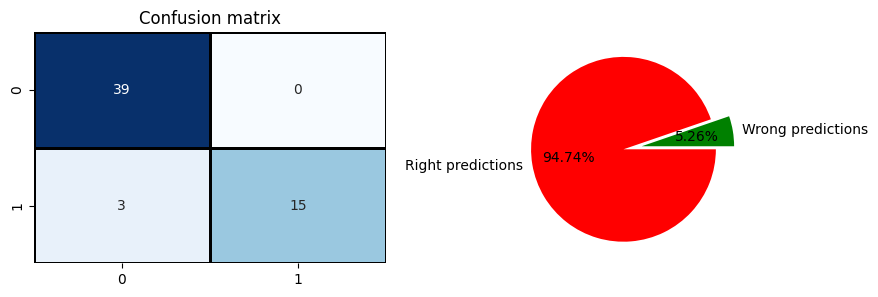

In [319]:
from sklearn.metrics import confusion_matrix

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))

temp = confusion_matrix(y_test, predictions)

sns.heatmap(temp, annot = True, cbar = False, cmap = PALETTE, 
            linewidth = 2, linecolor = "k", ax = ax1)

pd.DataFrame({"Predictions" : [temp[0][1] + temp[1][0], temp[0][0] + temp[1][1]]},
            index = ["Wrong predictions", "Right predictions"]).plot.pie(y = 'Predictions', ax = ax2,
                                                                        legend = False, explode = [0.1, 0.1],
                                                                         autopct = '%1.2f%%',
                                                                         textprops = {'fontsize' : 10},
                                                                        colors = ["green", "red"])


ax2.set_ylabel("")
ax1.set_title("Confusion matrix");

The model exhibited a commendable predictive accuracy of approximately 94.74%. Within this accuracy, there was a subset of 5.26% where the model made diagnoses as malignant when, in fact, they were benign. This type of error, known as false positives, is not uncommon in medical diagnoses. It implies that the model, in a small portion of cases (roughly 50 observations in this instance), may have raised concerns about malignancy when the condition was, in reality, benign.

It's noteworthy that, in this evaluation, the model's performance leaned more toward making false positive errors rather than false negatives. False negatives would imply failing to identify malignancies that were actually present, which can be considerably more critical in a medical context. However, in this assessment, the model demonstrated an encouraging capability to avoid false negative errors. While there's room for fine-tuning and minimizing false positives, this outcome underscores the algorithm's proficiency in capturing potential cases, even if it occasionally exhibits heightened caution.

## Classification report

A classification report is a comprehensive assessment tool used to evaluate the performance of a classification model. It's especially valuable in machine learning scenarios where the objective is to categorize data into distinct classes or categories. This report offers a detailed breakdown of how effectively the model has carried out this classification task.

They shed light on its efficacy for individual classes and help identify potential issues like overfitting or underfitting. Such reports are especially instrumental in domains like medical diagnosis, spam detection, sentiment analysis, and various contexts where precise classification is of paramount importance.

In [320]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,  target_names = ["B", "M"]))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        39
           M       1.00      0.83      0.91        18

    accuracy                           0.95        57
   macro avg       0.96      0.92      0.94        57
weighted avg       0.95      0.95      0.95        57



## Predictions Distribution

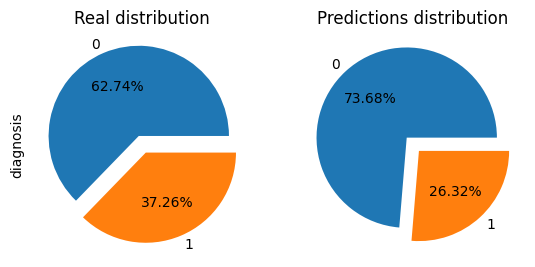

In [321]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

pd.Series(predictions).value_counts().plot.pie(explode = [0.1, 0.1],
                                                                 autopct = '%1.2f%%',
                                                                 textprops = {'fontsize' : 10},
                                                                 ax = ax2, title = 'Predictions distribution')

pd.Series(y).value_counts().plot.pie(explode = [0.1, 0.1],
                                                  autopct = '%1.2f%%',
                                                  textprops = {'fontsize' : 10},
                                                  ax = ax1, title = 'Real distribution');

## Probabilities distribution

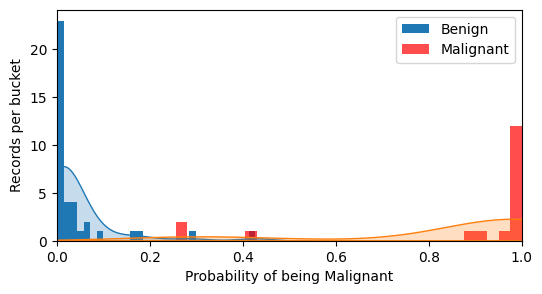

In [322]:
plt.figure(figsize = (6, 3))

plt.hist(probabilities[y_test == 0], bins = 30, label = 'Benign')
plt.hist(probabilities[y_test == 1], bins = 30, label = 'Malignant',
         alpha = 0.7, color = 'r')

sns.kdeplot(probabilities[y_test == 0], fill = True)
sns.kdeplot(probabilities[y_test == 1], fill = True)

plt.xlim(0, 1)
plt.xlabel('Probability of being Malignant')
plt.ylabel('Records per bucket')
plt.legend();

## Wrong predictions in the original data

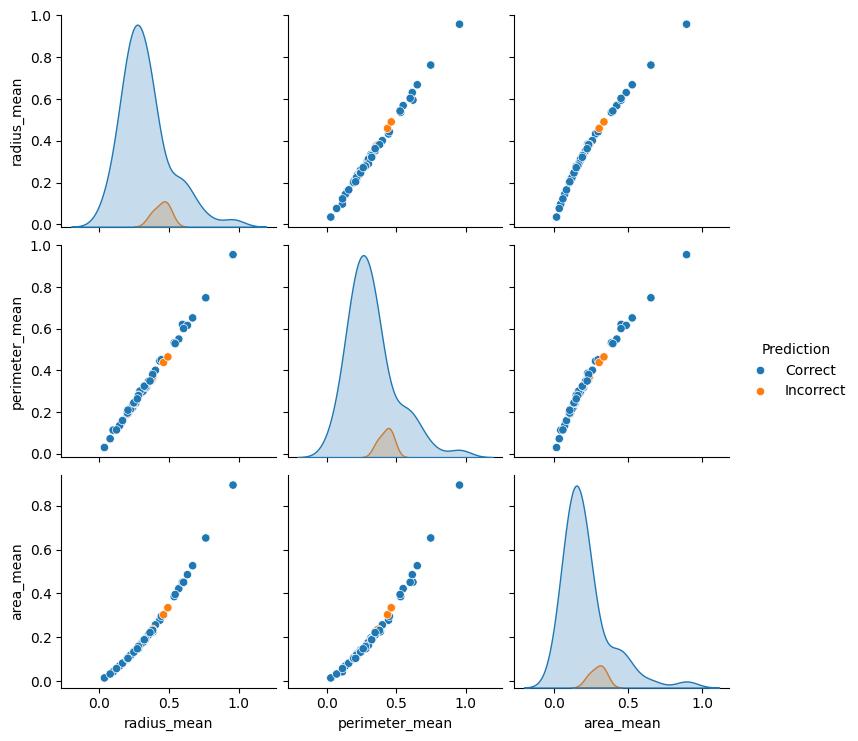

In [323]:
mean_features = [feature for feature in X_test.columns if "mean" in feature]

TESTING = X_test.copy()
TESTING["Prediction"] = (y_test == predictions).map({True:"Correct",
                                                     False:"Incorrect"})

sns.pairplot(data = TESTING, vars = mean_features[:3], hue = "Prediction");

The misclassified observations stand out as they fall within the middle range of the data distribution. This observation is particularly significant, given that throughout the entire project, a consistent pattern emerged where benign diagnoses were associated with lower feature values, while malignant diagnoses tended to have higher values. Since these observations reside in the middle of this spectrum, it explains why the model encountered difficulty in correctly classifying them. It underscores the notion that instances with values in the mid-range are inherently challenging to classify due to the overlapping distribution of diagnoses.

Rather than causing concern, this observation provides valuable insights. It suggests that when making diagnoses for patients, these middle-range values should be flagged and subjected to closer scrutiny. By paying heightened attention to these borderline cases, medical practitioners can potentially make more informed decisions, especially when the model's predictions are less definitive.

In summary, this project has led us to a robust solution for our classification problem. Furthermore, it has allowed us to identify areas of vulnerability in the model's performance, which can be systematically monitored and addressed. This holistic understanding equips us to navigate and improve upon the model's limitations, ultimately enhancing the quality of diagnoses and patient care.

# Providing the solution

To deliver the solution, we intend to streamline the entire process into a unified classifier. This approach entails consolidating all the steps into one cohesive model. In practical terms, it involves taking the entire dataset and training it using the winning algorithm identified in the previous analysis. The primary objective here is to harness the full potential of the dataset, leveraging its comprehensive information to cover a broader spectrum of observations.

By amalgamating the various phases of data preprocessing, feature engineering, model selection, and training into a single classifier, we aim to create a more efficient and holistic solution. This unified approach ensures that the model benefits from the entire dataset, capitalizing on the rich diversity of data points to enhance its predictive capabilities. It simplifies the workflow, making it more streamlined and effective, while also facilitating scalability and ease of deployment for real-world applications.

In [324]:
# Classifier
model = VotingClassifier(estimators = [('MLPC', MLPClassifier(random_state = RANDOM_STATE)), 
                                         ('Linear Discriminant', LinearDiscriminantAnalysis())],
                                        voting = 'soft')

# Training
model.fit(X, y)

VotingClassifier(estimators=[('MLPC', MLPClassifier(random_state=43154501)),
                             ('Linear Discriminant',
                              LinearDiscriminantAnalysis())],
                 voting='soft')

## The solution

As this notebook is hosted on Kaggle, there is no need for me to save the model or its weights. Nevertheless, it is worth highlighting the remarkable success achieved throughout this project. It has effectively addressed all initial concerns regarding the dataset and the complexity of the problem at hand. In hindsight, it's evident that this solution has not only met but exceeded expectations.

What is particularly satisfying is that this success has been achieved without delving into extensive hyperparameter optimization or employing additional tuning techniques. This underscores the model's innate strength and efficiency in addressing the core objectives of the project.

In reflection, it's safe to say that this journey has yielded an exemplary solution. It has provided a robust, reliable, and accurate means of distinguishing between malignant and benign diagnoses in breast cancer cases. The model's performance, coupled with the insights gained along the way, leaves little room for doubt regarding its effectiveness in addressing this critical healthcare challenge. In essence, this project stands as a testament to the power of data science in the realm of medical diagnosis and underscores the potential for impactful solutions in the field.

# Final thoughts

This notebook presented a comprehensive exploration of the Breast Cancer Wisconsin dataset, with the overarching goal of constructing a machine learning solution capable of discriminating between malignant and benign diagnoses. Throughout the project, a consistent emphasis has been placed on achieving a solution characterized by robustness and reproducibility, a paramount requirement given the critical nature of the health dataset under examination.

A fundamental starting point for this project was acquiring a profound understanding of the dataset at hand. This entailed a meticulous investigation into the dataset's origins, the methods employed in its collection, and a thorough comprehension of its dictionary. These steps were taken to ensure a holistic grasp of the dataset's context and intricacies. The dataset itself comprises a collection of features computed from digitized images of breast mass fine needle aspirates (FNAs), each of which characterizes cell nuclei within the images.

Subsequent phases of the project have included data cleaning, where the objective was to prepare the dataset for analysis. It is noteworthy that this dataset exhibited a high degree of cleanliness, free from the typical complications of missing values or duplicated entries. Consequently, the project seamlessly transitioned into phases of feature engineering and dimensionality reduction, capitalizing on the dataset's pristine condition.

The exploration and analysis of the dataset have unfolded systematically, unveiling critical insights. Of paramount significance is the discovery that higher feature values consistently correlate with malignant diagnoses. This revelation serves as the foundation for much of the subsequent analysis and underscores the importance of features in characterizing the nature of the disease. Furthermore, the dataset revealed high correlations among specific features, indicating the potential for feature selection, an avenue explored to refine the dataset.

Feature selection and engineering have been pivotal in shaping the analysis. Features were thoughtfully chosen based on their correlations with the target variable, a process of distillation to extract the most salient attributes for modeling. Employing an exhaustive selection approach, the project identified the features most relevant for modeling.

The core of the project lies in the modeling phase, where various classification algorithms were rigorously evaluated. These algorithms encompassed a spectrum of approaches, including Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Naive Bayes, Gradient Boosting, and more. Rigorous assessment occurred through the application of a 10-fold cross-validation approach, ensuring a robust evaluation of model performance. Notably, Linear Discriminant Analysis (LDA) and Multi-layer Perceptron Classifier (MLPC) surfaced as the standout performers among the considered models.

A pivotal juncture arrived with the selection of the final model. After a meticulous analysis, a Soft Voting classifier was deemed optimal. This ensemble classifier capitalizes on the strengths of both LDA and MLPC, delivering a final model that maximizes predictive performance.

Evaluation of the model uncovered an impressive accuracy rate of approximately 94.74%. Notably, the model did display a minor bias toward false positives, as indicated by a small percentage of benign diagnoses being erroneously predicted as malignant. Nonetheless, this is a notable achievement, considering that it entails evaluating a subset of the dataset, approximately 50 observations. Furthermore, the model exhibited a noteworthy ability to avoid false negatives, where no benign diagnosis was incorrectly classified as malignant.

Concluding this project, it is evident that a robust solution for breast cancer diagnosis has been achieved. This solution not only boasts accuracy but also reveals valuable insights. One such insight is the challenge of classifying middle-range values, which often fall within the overlapping distribution of diagnoses. Rather than presenting a concern, this observation underscores the importance of flagging and closely scrutinizing middle-range values during diagnosis, enhancing the model's utility in clinical practice.

I extend my heartfelt appreciation for your engagement and journeying through this notebook with me. Your time and attention are sincerely valued. If you're interested in exploring more of my work, I encourage you to delve into my other notebooks and browse through my GitHub repositories. There, you'll find a wealth of diverse projects and insights that span various domains and topics. Your curiosity and exploration are wholeheartedly welcomed, and I look forward to sharing more discoveries and knowledge in the future.